## EMPLOYEE PERFORMANCE ANALYSIS


INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry.

## PROBLEM STATEMENT

Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points.

**BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE**

## OBJECTIVE
- Find the core underlying causes of this performance issues.
- Clear indicators of non performing employees, so that any penalization of non-performing employee, if required.



### EXPLORATORY DATA ANALYSIS SUMMARY:
* Basic checks of data
* Examine the data
* Statistical measures of data
* Department Wise performance 
* Percent count of employee department with performance rating
* Top 3 Important Factors effecting employee performance
* Checking the distribution of continuous features


#### IMPORTING NECESSARY LIBRARY:

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from scipy import stats

import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

print("Packages imported Successfully!")

#

Packages imported Successfully!


#### LOAD DATA FOR EXPLOTARY DATA ANALYSIS

In [227]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

#### BASIC CHECKS OF DATA

In [228]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [229]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [230]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [231]:
data.shape

(1200, 28)

* Dataset contain total 28 features with 1 unique feature and 1200 observation.

### EXAMINE THE DATA

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

* In this data two type of data is available [int64, object]

Some categorical columns are encoded as follows:

- Emp education level: 1-- Below college, 2-- College, 3-- Bachelor, 4-- Master, 5-- Doctor
- Emp environ satisfaction: 1-- Low, 2-- Medium, 3-- High, 4-- Very High
- Emp job involvment: 1-- Low, 2-- Medium, 3-- High, 4-- Very High
- Emp job satisfaction: 1-- Low, 2-- Medium, 3-- High, 4-- Very High
- Performance rating: 1-- Low, 2-- Good, 3-- Excellent, 4-- Outstanding
- Relationship satisfaction: 1- Low, 2-- Medium, 3-- High, 4-- Very High
- Emp work life balance: 1- Bad, 2-- Good, 3-- Better, 4-- Best

### STATISTICAL MEASURE OF DATA

In [233]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


* In numerical features no constant column is present.

In [234]:
#To check whether there is any absurd value to clean

print('UNIQUE VALUES: \n')
for i in data.columns:
    print(i,':', data[i].unique())

UNIQUE VALUES: 

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Age : [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DistanceFr

In [235]:
data.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


* In categorical data also no constant column is present.

### DEPARTMENT WISE PERFORMANCE RATING

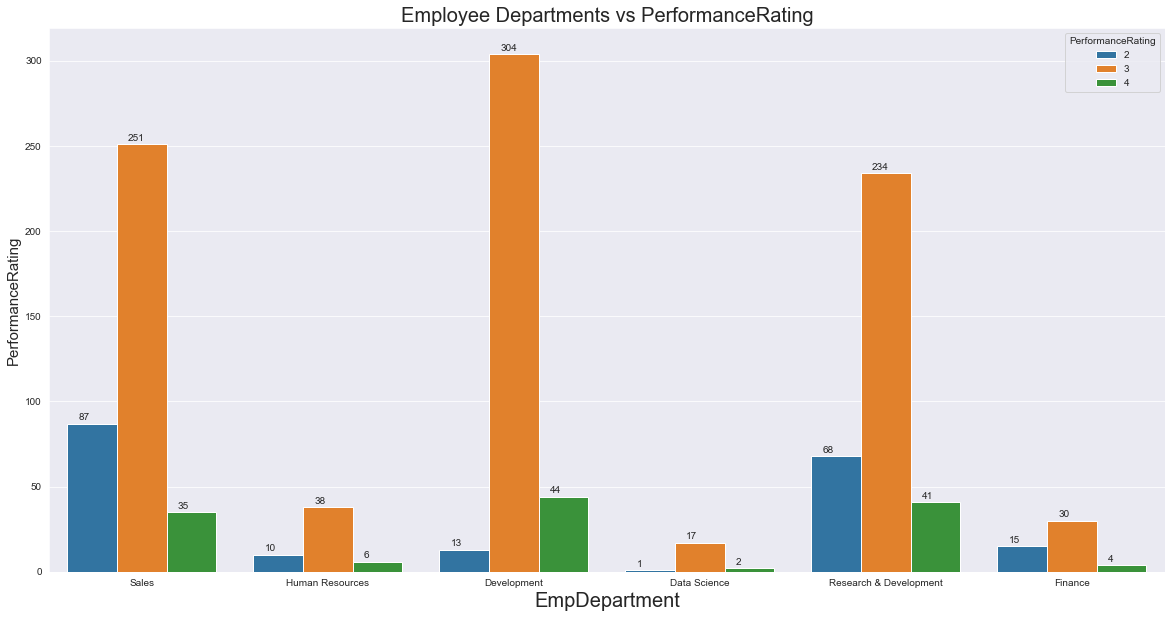

In [236]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()


**Observation:**

**From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating**

**Sales:** The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

**Human Resources:** The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

**Development:** The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

**Data Science:** The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

**Research & Development:** The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

**Finance:** The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

#### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [237]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


### So from the below data we got clear indication of those employees who have low performance, low job involvement and have less or equal to 2 years of experience.¶

In [238]:
# Filtering those employees whose performance rating is low but working in thiscompany for less or equal to 2 years

low_per = data.loc[(data['PerformanceRating'] == 2) & (data['Attrition'] == 'No') & (data['EmpJobInvolvement']<= 2)
                  & (data['ExperienceYearsAtThisCompany'] <= 2),
                  ['EmpNumber','ExperienceYearsAtThisCompany','EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

,EmpNumber,ExperienceYearsAtThisCompany,EmpJobInvolvement,Attrition,PerformanceRating
165,E1001300,2,2,No,2
182,E1001322,2,2,No,2
605,E1002079,2,2,No,2
728,E1002291,2,2,No,2
878,E100461,2,2,No,2
1023,E100702,2,2,No,2


**So, As per our Goal--2, those 6 non performing employees can be penalized or given final warning for their performance.**

In [239]:
#To analyse on performance as per department & environment satisfaction wise

pivot1 = data.pivot_table(index = 'EmpDepartment', values = 'EmpEnvironmentSatisfaction',
                         columns = 'PerformanceRating', aggfunc='mean')
pivot1

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1.000000,3.058824,3.000000
Development,1.461538,2.726974,2.954545
Finance,1.600000,3.333333,3.750000
Human Resources,1.600000,2.842105,3.000000
Research & Development,1.602941,3.038462,3.219512
Sales,1.586207,2.968127,3.028571


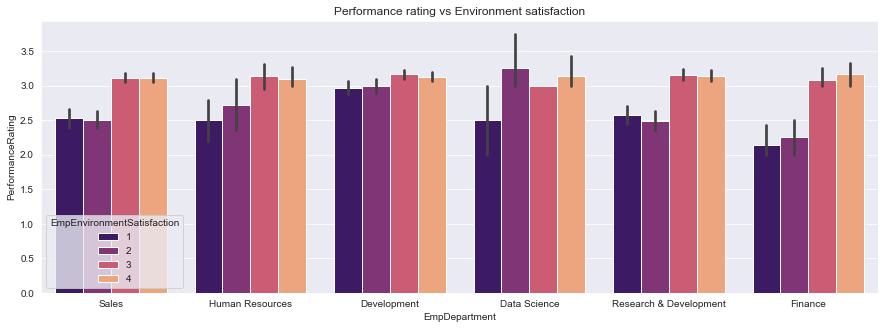

In [240]:
plt.subplots(figsize=(15, 5))
bar = sns.barplot(data = data, x= 'EmpDepartment', y = 'PerformanceRating',hue= 'EmpEnvironmentSatisfaction',
                  palette = 'magma').set(title = "Performance rating vs Environment satisfaction")

**We can see that when environment satisfaction is low, performance is low.**

[Text(0.5, 1.0, 'Distribution of performance rating by each department.')]

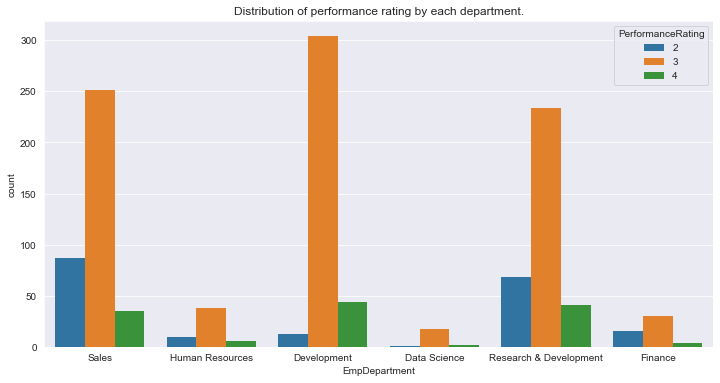

In [241]:
# Analyze each department separately

plt.subplots(figsize=(12, 6))
count = sns.countplot(data= data, x='EmpDepartment',hue = 'PerformanceRating', linewidth=0 )
count.set(title = 'Distribution of performance rating by each department.')


[Text(0.5, 1.0, 'Relation between Salary hike & Performance rating')]

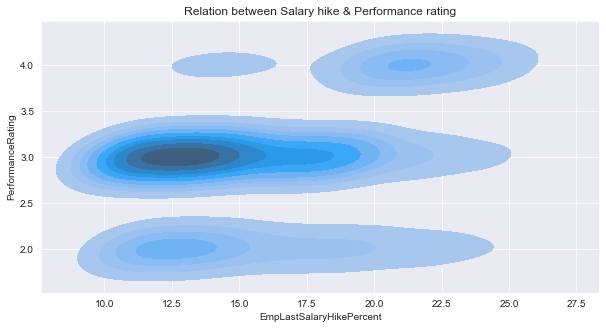

In [242]:
# Analysis of performance rating as per Salary hike

plt.subplots(figsize=(10, 5))
kde = sns.kdeplot(data=data, x="EmpLastSalaryHikePercent", y ='PerformanceRating',multiple="stack",
                  palette = 'viridis', fill = True, linewidth = 0)
kde.set(title = 'Relation between Salary hike & Performance rating')

**We can clearly observe that where salary hike is low, performance rating is low.**

In [243]:
#Performance rating as per job involvement & job satisfaction

fig = px.pie(data, values='EmpJobSatisfaction', names= 'PerformanceRating', color= 'EmpJobInvolvement',
            title = 'Performance rating as per job involvement & job satisfaction',width=600, height=400)
fig.show()

**We can see that 11% and 16.3% of employees having low job satisfaction and job involvement have low performance ratings**

[Text(0.5, 1.0, 'Performance rating Job Role wise')]

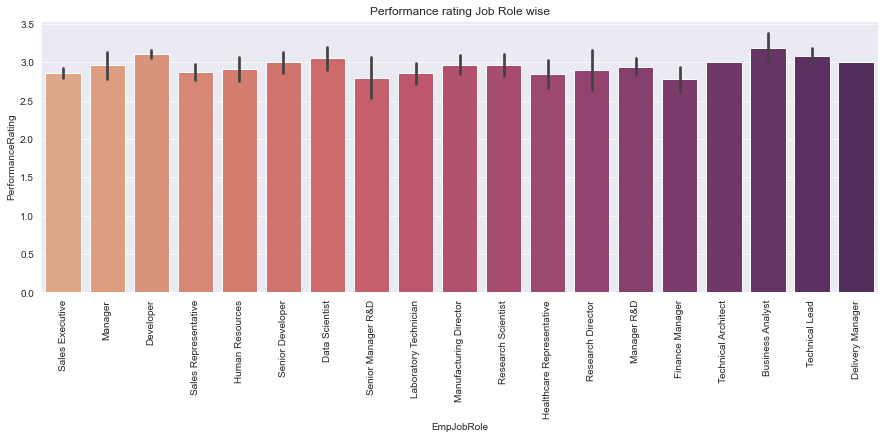

In [244]:
# Analysis of performance rating employee role wise

plt.subplots(figsize=(15, 5))
bar = sns.barplot(data= data, x='EmpJobRole', y='PerformanceRating', palette = 'flare')
plt.xticks(rotation=90)
bar.set(title = 'Performance rating Job Role wise')

[Text(0.5, 1.0, 'Performance rating Experience wise')]

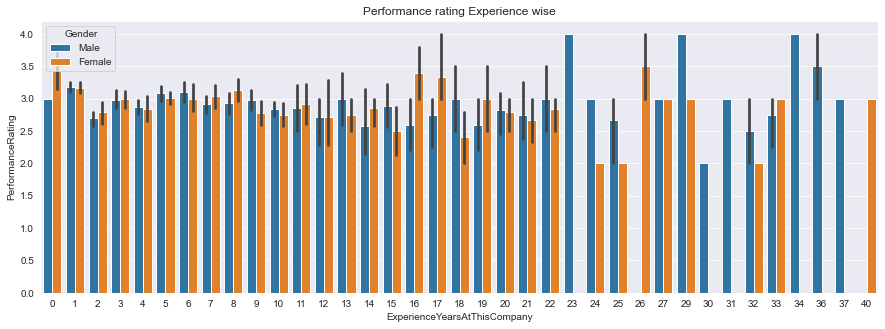

In [245]:
# Analysis experience wise

plt.subplots(figsize=(15, 5))
bar = sns.barplot(data= data, x='ExperienceYearsAtThisCompany', y='PerformanceRating',
                  hue = 'Gender')
bar.set(title = 'Performance rating Experience wise')

In [246]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [247]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


### TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**From visualisation file we get the top 3 factor affecting to the employee performance**
1. Emp Environment Satisfaction
2. Emp Last Salary Hike Percent
3. Emp Work Life Balance

From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance

**Observation:**

**1.Employee Enviroment satisfaction:** 
* Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

**2.Employee last salary hike percent:** 
* More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
* Employees whose salary hike percentage is in between 20-22%, There performance rating is 4

**3.Employee work life balance:** 
* In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees


**Overall view**

From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance

### DATA PRE-PROCESSING & FEATURE SELECTION:

#### DATA PRE-PROCESSING SUMMARY:
* Ckeck Missing Value
* Convert categorical to numerical
* Check outliers & Impute outliers
* Feature transformation
* Feature scaling


#### FEATURE SELECTION SUMMARY:
* Drop unique & Constant Column
* Check correlation with heatmap & Remove highly correlated feature
* Check Duplicates 
* Principle component analysis
* Save pre-process data

#### IMPORT NECESSARY LIBRARY

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

#### LOAD DATA FOR EXPLORATORY DATA ANALYSIS

In [249]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

### CHECK MISSING VALUE:

In [250]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* Their is no missing value present in the data.

### CONVERT CATEGORICAL TO NUMERICAL

In [251]:
# Get all categorical feature list
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

**Technique Used:**

**1.Manual Encoding:** Manual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

**2.Frequency Encoding:** Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

#### 1.Gender: 

In [252]:
# Get value counts of gender
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [253]:
# Use mannual encoding to map the labels
data.Gender = data.Gender.map({'Male':1,'Female':0})

* Map male with 1 and female with 0 

#### 2.Education Background

In [254]:
# Get value counts of Education Background
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [255]:
# Use frequency encoding
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [256]:
# Checking conversion happen or not
data.EducationBackground.value_counts()

5    492
4    384
3    137
2    100
1     66
0     21
Name: EducationBackground, dtype: int64

#### 3.Marital Status

In [257]:
# Get the value counts of marital status
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [258]:
# Use mannual encoding
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [259]:
# Check conversion happen or not
data.MaritalStatus.value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

#### 4.Employee Department

In [260]:
# Get the value counts of employee department 
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [261]:
# Use Frequency encoding
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [262]:
# Check conversion happen or not
data.EmpDepartment.value_counts()

5    373
4    361
3    343
2     54
1     49
0     20
Name: EmpDepartment, dtype: int64

#### 5.Employee Job Role

In [263]:
# Getting the value counts of EmpJobRole
data.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [264]:
# Use frequency encoding because feature contain a lots of label
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [265]:
# Check conversion happen or not
data.EmpJobRole.value_counts()

18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: EmpJobRole, dtype: int64

#### 6.Business Travel Frequency:

In [266]:
# Get the value count of buisness travel frequency
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [267]:
# Use mannual encoding Because feature contain minimum label
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [268]:
# Check conversion happen or not
data.BusinessTravelFrequency.value_counts()

2    846
1    222
0    132
Name: BusinessTravelFrequency, dtype: int64

#### 7.Overtime:

In [269]:
# Get the value count of Overtime
data.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [270]:
# Use mannual Encoding
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [271]:
# Check conversion happen or not
data.OverTime.value_counts()

1    847
0    353
Name: OverTime, dtype: int64

#### 8.Attrition

In [272]:
# Get the value counts of Attrition
data.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [273]:
# Use Mannual encoding because feature contain less no of label
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [274]:
# Check conversion happen or not
data.Attrition.value_counts()

1    1022
0     178
Name: Attrition, dtype: int64

In [275]:
# Check all data features 
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,1,5,18,2,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,1,3
1,E1001006,47,1,3,1,5,18,2,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,1,3
2,E1001007,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4
3,E1001009,41,1,0,0,2,11,2,10,4,2,73,2,5,4,3,1,15,2,23,2,2,21,6,12,6,1,3
4,E1001010,60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,1,3


### CHECK OUTLIERS AND IMPUTE OUTLIERS:

**BoxPlot:** Box plots are used to show distributions of numeric data values as well as it helps to detect the outliers.

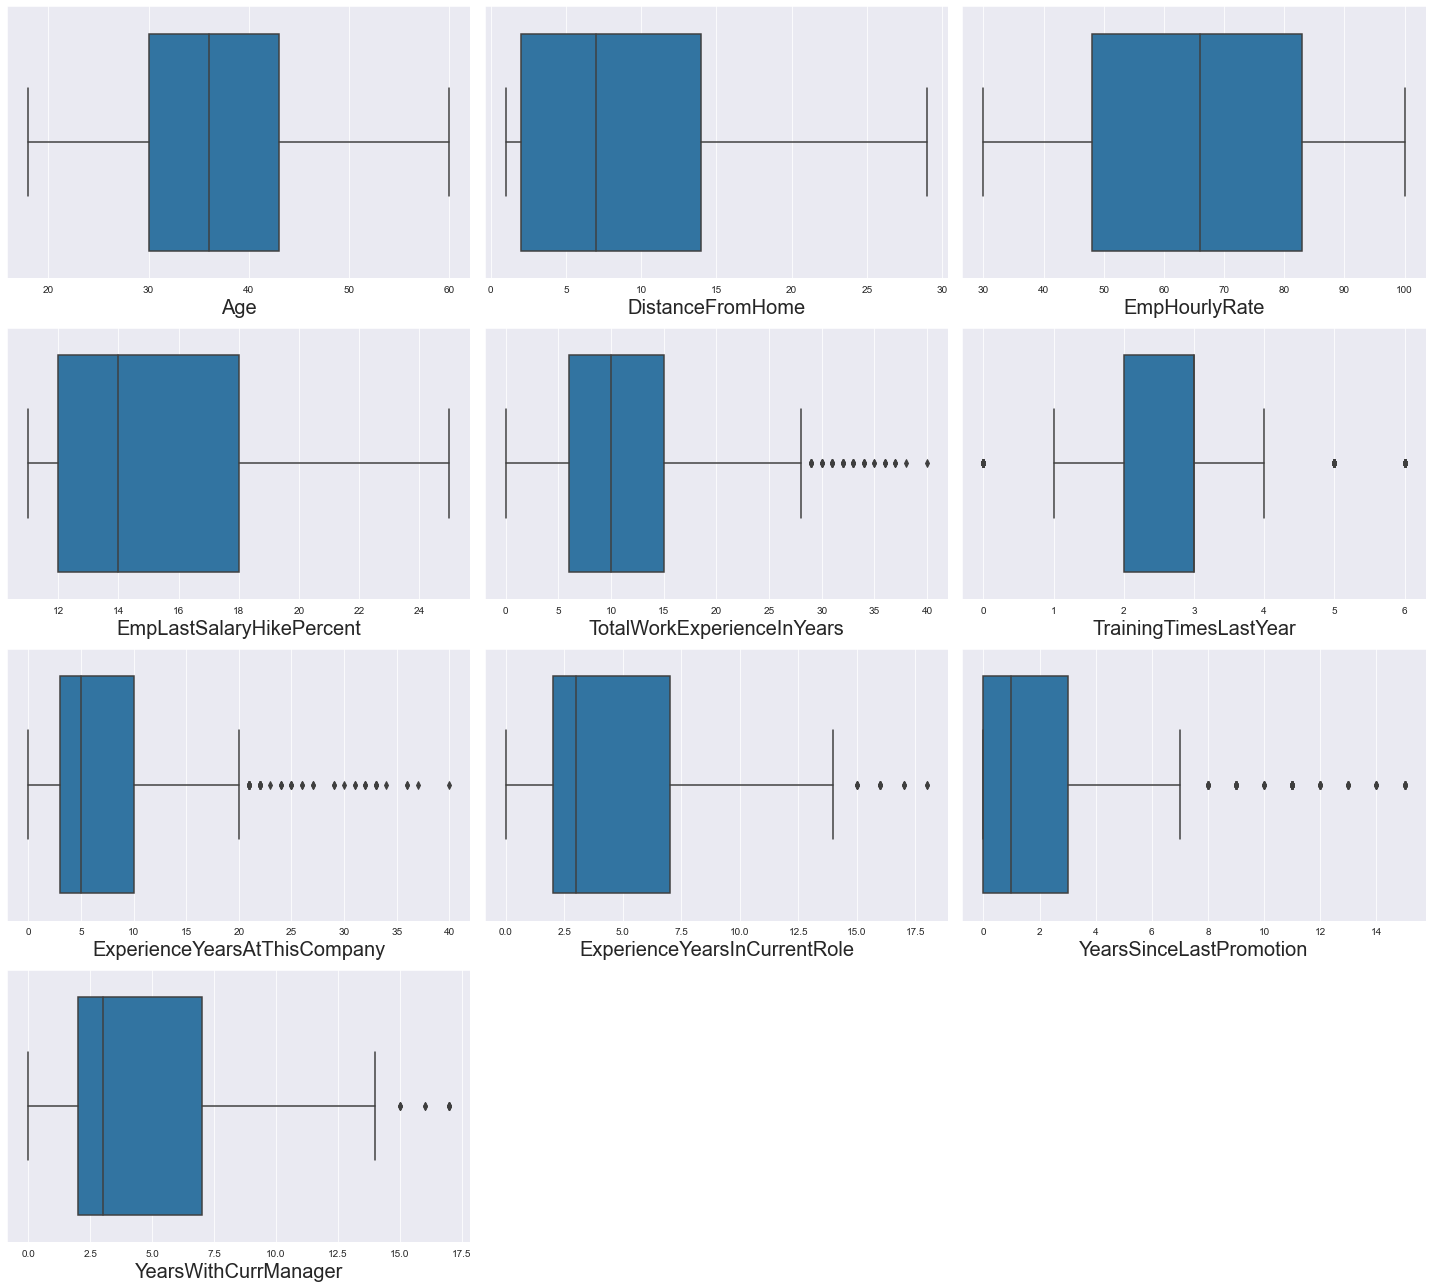

In [276]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


* Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.

**IQR:**
* IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

#### 1.Total Work Experiance in year

In [277]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [278]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [279]:
# filtering data after imputation
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 2.Training Times Last Year

In [280]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [281]:
# Impute outlier in max & minmum limit
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [282]:
# Filtering the min limit
data.loc[data['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [283]:
# Filtering the max limit
data.loc[data['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 3.Experience Years At This Company

In [284]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [285]:
# Impute outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [286]:
# Filtering the data
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 4.Experience Years In Current Role

In [287]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [288]:
# Impute the outlier
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [289]:
# Filtering the data
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 5.Years Since Last Promotion

In [290]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [291]:
# impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [292]:
# Filtering data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 6.Years With Current Manager

In [293]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [294]:
# impute outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [295]:
# Filtering the data
data.loc[data['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### CHECKING OUTLIER AFTER IMPUTATION

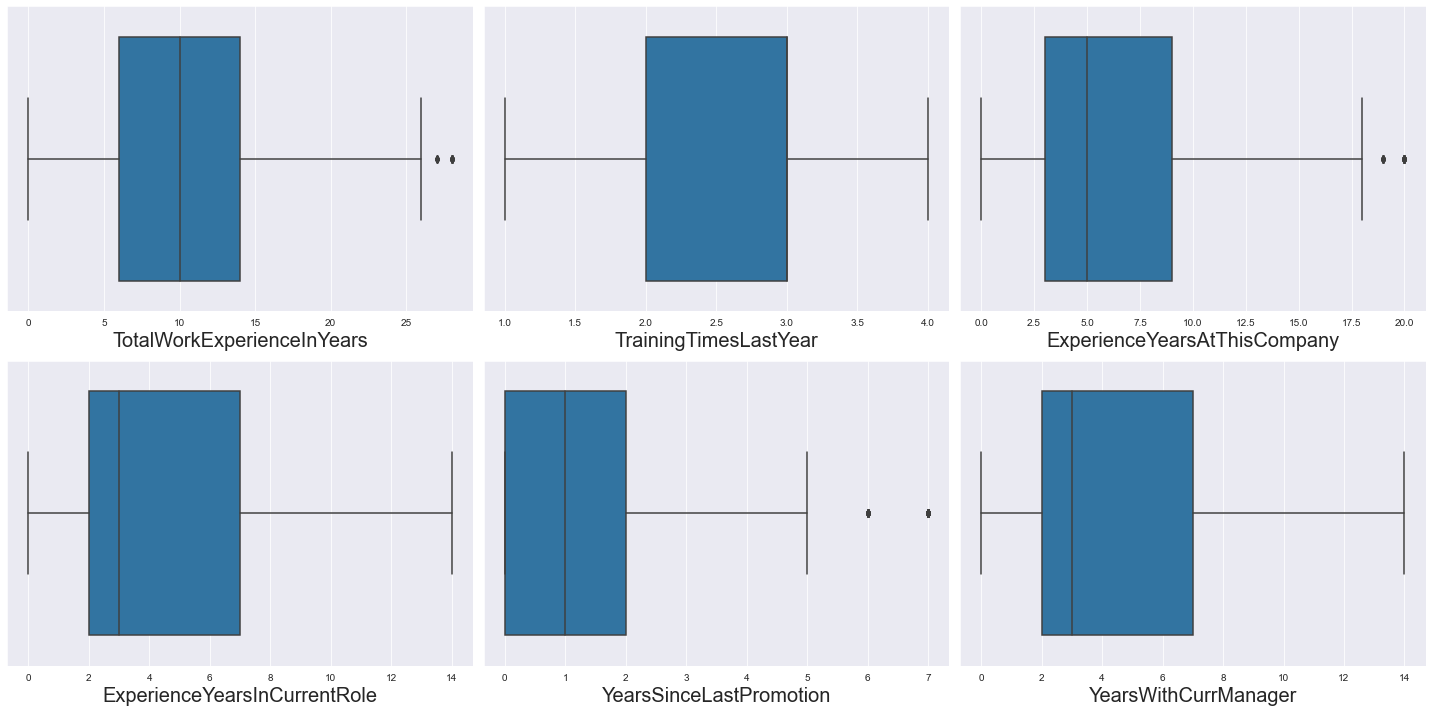

In [296]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


**Observation:**
* Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

### FEATURE TRANSFORMATION

* From the last EDA file we get the yearsince last promotion feature have some skewed in data, so we are going to use square root transformation.

**Q-Q Plot:**  Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

In [297]:
# define a function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

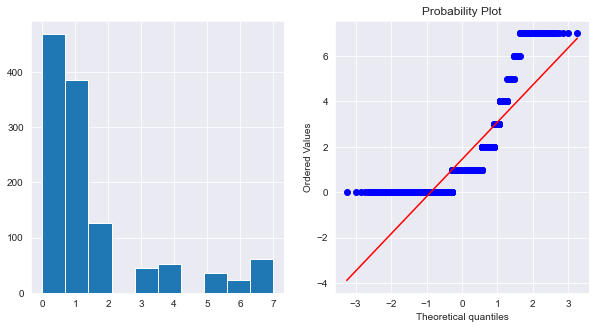

In [298]:
plot_data(data,'YearsSinceLastPromotion')

#### SQUARE ROOT TRANSFORMATION

In [299]:
data['square_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

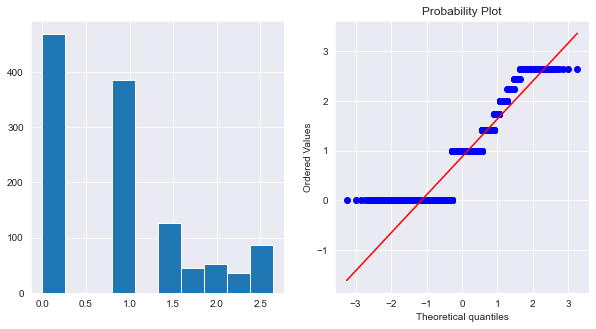

In [300]:
plot_data(data,'square_YearsSinceLastPromotion')

* Now some points are close to the line.

### SCALING THE DATA

**Standard Scaling:**
Standardization is the process of scaling the feature, it assumes the feature follow  normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [301]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])

In [302]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,1,3,-1.057559
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,1,3,0.151501
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,1,4,0.151501
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,1,3,0.151501
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,1,3,0.652311


### FEATURE SELECTION

#### DROP UNIQUE AND CONSTANT FEATURES

In [303]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
data.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

#### CHECKING CORELATION
**Heatmap:** A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

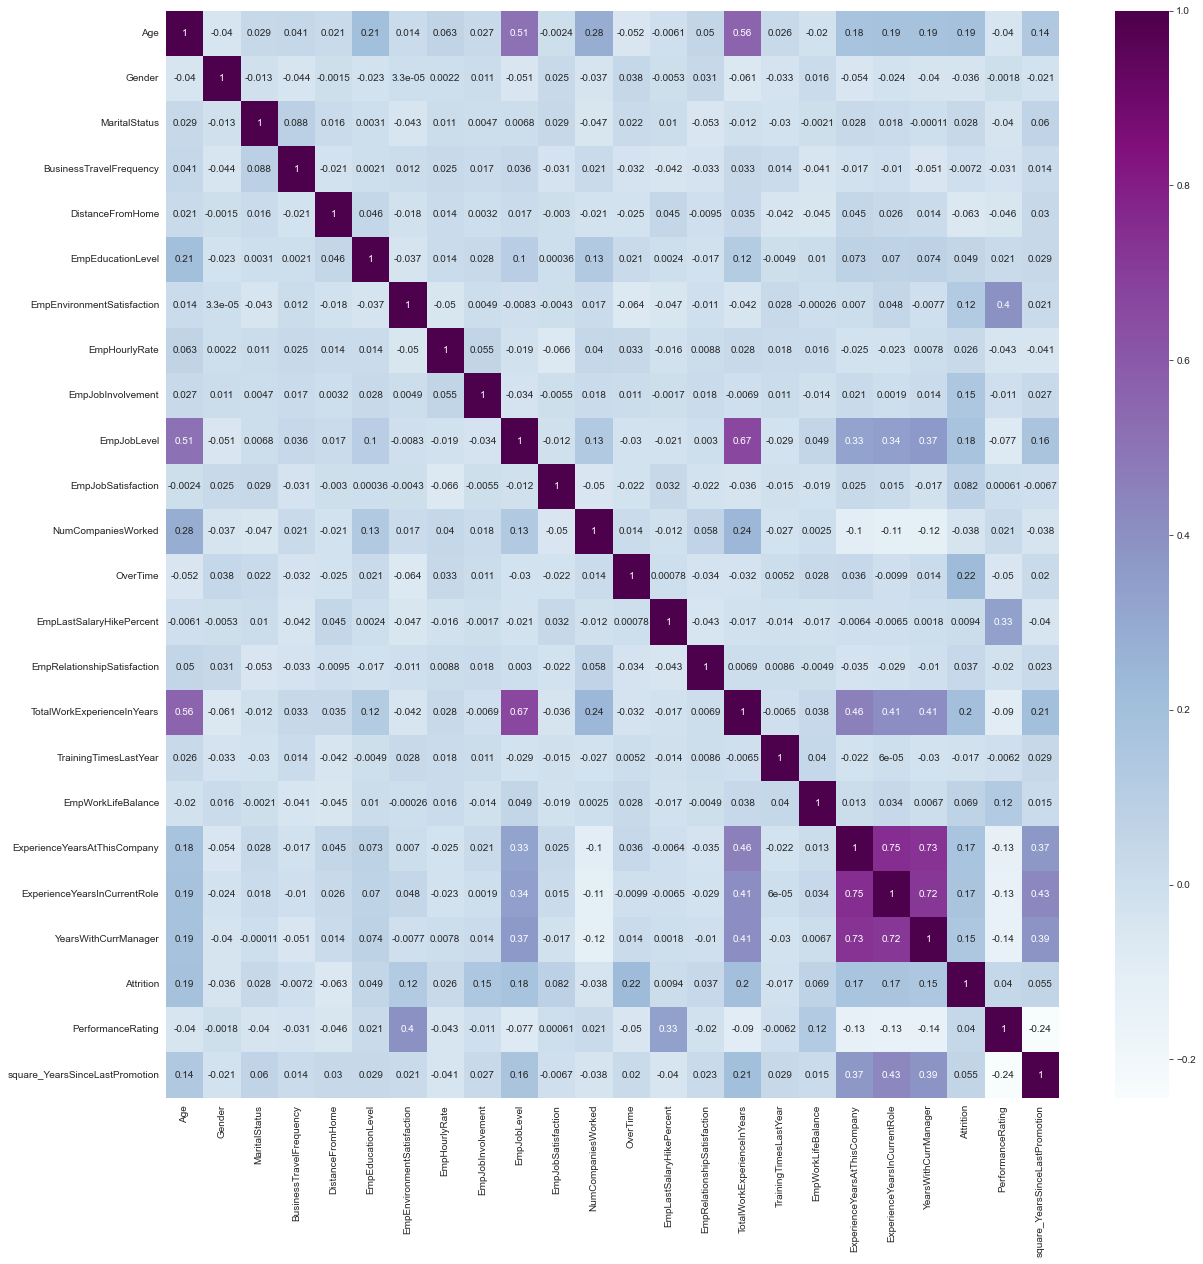

In [304]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

* From above heatmap scale we are clearly seen the their is no highly correlated feature in data
* But we confirm with the help of simple code

In [305]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


* Now we confirm their is no highly correlated feature is present.

#### CHECKING DUPLICATES

In [306]:
data.duplicated().sum()

0

* Their is no Duplicates is present in data.

#### PRINCIPLE COMPONENT ANALYSIS

* Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.

**Used For:** The dataset contain more than 25 feature, removes the noise in the data and keeps only the most important features in the dataset. That will mitigate the overfitting of the data and increase the model's performance.

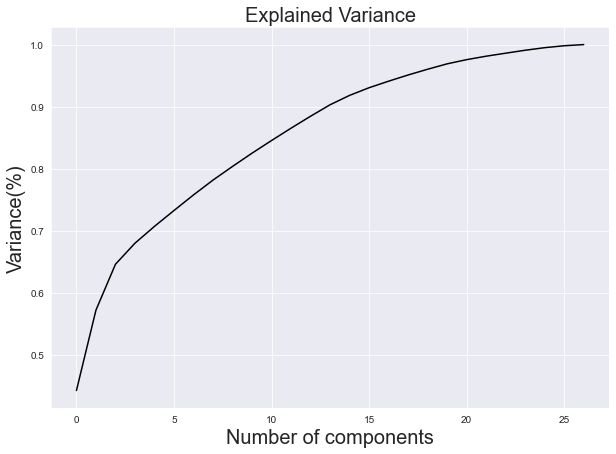

In [307]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

**Observation:** Data is contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

In [308]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(data)
new_data

array([[-4.47979357e+00, -1.62579961e+00,  1.04815246e+00, ...,
        -5.02890736e-01,  2.28337153e-01, -3.52744289e-01],
       [-4.35607380e+00, -6.82890846e-02,  2.01617388e+00, ...,
        -8.88367129e-01, -2.37235986e-01, -7.10042471e-01],
       [-4.24318059e+00,  2.56096162e+00,  4.36307191e+00, ...,
        -4.34724440e-01, -3.56723825e-01,  6.46996038e-01],
       ...,
       [ 1.64245087e+00, -1.73309807e+00,  3.13585566e+00, ...,
        -1.70950647e-01,  3.39096853e-01,  1.12605457e+00],
       [ 9.10590984e+00, -2.09875367e+00,  1.48314921e+00, ...,
         6.10226389e-01,  1.08399769e-02, -2.99560396e-01],
       [-4.36428097e+00,  5.98213577e+00, -2.10105411e+00, ...,
         6.48347080e-01, -7.17937795e-03, -2.95697975e-02]])

#### CREATE NEW DATAFRAME

In [309]:
principle_df = pd.DataFrame(data=new_data,columns=['Age','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','OverTime','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager','Attrition'])


# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data.PerformanceRating

principle_df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


### SAVE PRE-PROCESS DATA

In [310]:
principle_df.to_csv('employee_performance_analysis_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')

# Get first five rows 
df.head()

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating
0,0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


### VISUALIZATION SUMMARY: 
1. Domain Analysis Of all features
2. Univariate Analysis with insights
3. Bivariate Analysis with insights
4. Multivariat Analysis with insights

### IMPORTING THE NECESSAERY LIBRARY

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  # setting up background
from scipy import stats

# TO avoid warnings
import warnings 
warnings.filterwarnings('ignore')

### READING DATA FOR VISUALIZATION:

In [312]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features
data.head() # Get first 5 rows

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


### DOMAIN ANALYSIS

**First understand the menaing of feature and checking the impact of input feature to dependant feature**

##### 1.EmpNumber: 
 An Employee ID, sometimes referred to as an Employee Number or Employee Code, is a unique number that has been assigned to each individual staff member within a company.
 
##### 2.Age:
Age of employee in years

##### 3.Gender:
Gender of employee [Male/Feamale]

##### 4.EducationBackground:
This will be a high school diploma or a post-secondary degree of a employee

##### 5.MaritalStatus:
Civil status, or marital status, are the distinct options that describe a person's relationship with a significant other

##### 6.EmpDepartment:
Department specifice of employee

##### 7.EmpJobRole:
Job role means the key responsibility of a job profile or job position. 

##### 8.BusinessTravelFrequency:
The employee travel for comapny buisness purpose.

##### 9.DistanceFromHome:
Distance between home to company of employee.

##### 10.EmpEducationLevel:
Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.

##### 11.EmpEnvironmentSatisfaction:
satisfied or content employees are with elements like their jobs, their employee experience, and the organizations they work for.

##### 12.EmpHourlyRate:
Hourly Rate means the amount paid to an employee for each hour worked.

##### 13.EmpJobInvolvement:
Job involvement refers to a state of psychological identification with work—or the degree to which a job is central to a person's identity. From an organizational perspective, it has been regarded as the key to unlocking employee motivation and increasing productivity.

##### 14.EmpJobLevel:
Job levels, also known as job grades and classifications, set the responsibility level and expectations.

##### 15.EmpJobSatisfaction:
level of contentment employees feel with their job.

##### 16.NumCompaniesWorked:
employee work in how many companies.

##### 17.OverTime:
employee work overtime or not. [Yes, No]

##### 18.EmpLastSalaryHikePercent:
salary hike percent of employye in last year.

##### 19.EmpRelationshipSatisfaction:
Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.

##### 20.TotalWorkExperienceInYears:
Total experiance of employee in years.

##### 21.TrainingTimesLastYear:
Total training done by employee in last year.

##### 22.EmpWorkLifeBalance:
“Work-life balance” typically means the achievement by employees of equality between time spent working and personal life. A good work-life balance for employees can improve staff motivation, increase staff retention rates, reduce absence, attract new talent, and reduce employee stress.

##### 23.ExperienceYearsAtThisCompany:
Total no of eaxperiance at current company.

##### 24.ExperienceYearsInCurrentRole:
Total no of experiance in current job role.

##### 25.YearsSinceLastPromotion:
Total no of year since last promotion of employee.

##### 26.YearsWithCurrManager:
Employee total no of years with current manager. 

##### 27.Attrition:
Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for: Personal reasons. Professional motivation.

##### 28.PerformanceRating:
This is a target feature, tell that the total rating of employee performance in company.


## UNIVARIATE ANALYSIS

##### PLOTS USED:
**continuous features** 
* histogram: A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column. 
* lineplots:A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

**Discrete and Categorical**
* Countplot: countplot is used to Show the counts of observations in each categorical bin using bars.

**1.Age**

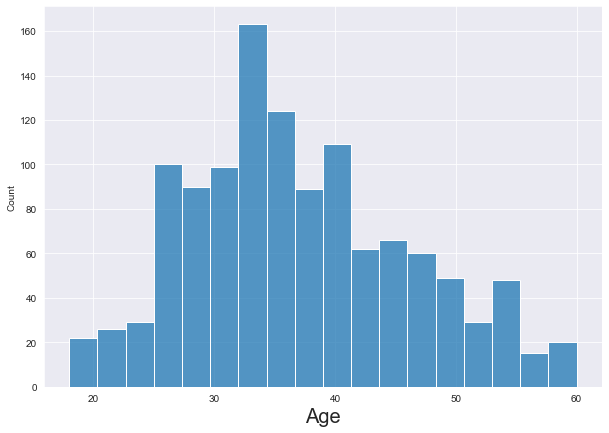

In [313]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=data)
plt.xlabel('Age',fontsize=20)
plt.show()

**Observation:** 
* The range of age between 18 to 60, most of the employee age between 25 to 40.

**2.Employee Hourly Rate**

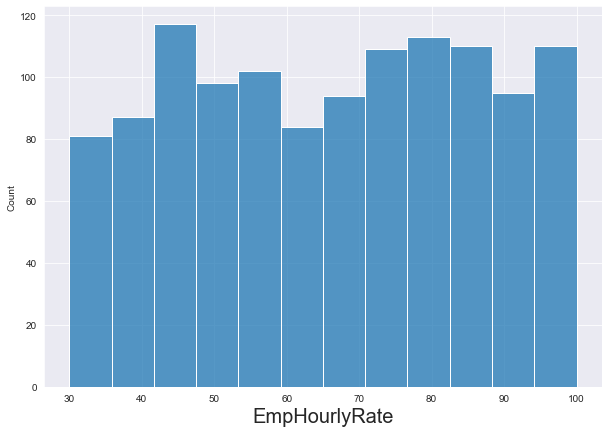

In [314]:
plt.figure(figsize=(10,7))
sns.histplot(x='EmpHourlyRate',data=data)
plt.xlabel('EmpHourlyRate',fontsize=20)
plt.show()

**Observation:** The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45.

**3.Total Work Experience In Year**

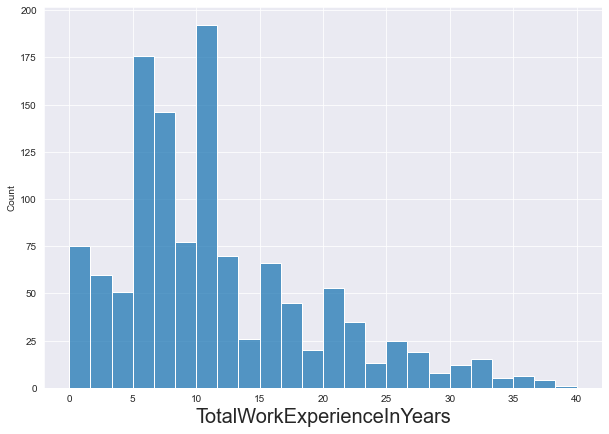

In [315]:
plt.figure(figsize=(10,7))
sns.histplot(x='TotalWorkExperienceInYears',data=data)
plt.xlabel('TotalWorkExperienceInYears',fontsize=20)
plt.show()

**Observation:** Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.

**4.Experience Years At This Company**

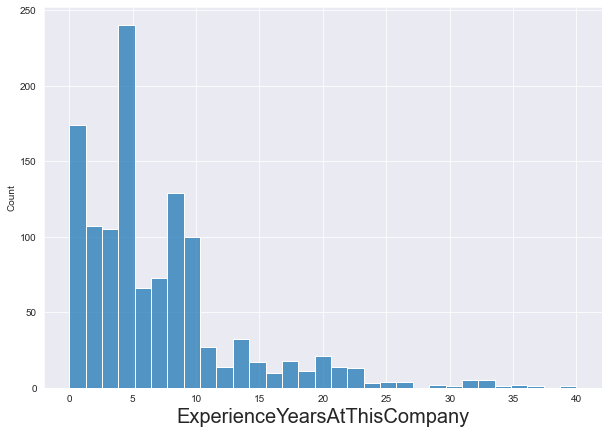

In [316]:
plt.figure(figsize=(10,7))
sns.histplot(x='ExperienceYearsAtThisCompany',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=20)
plt.show()

**Observation:** The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5.  

### USE SUBPLOT TO PLOTS MULTIPLE FEATURE

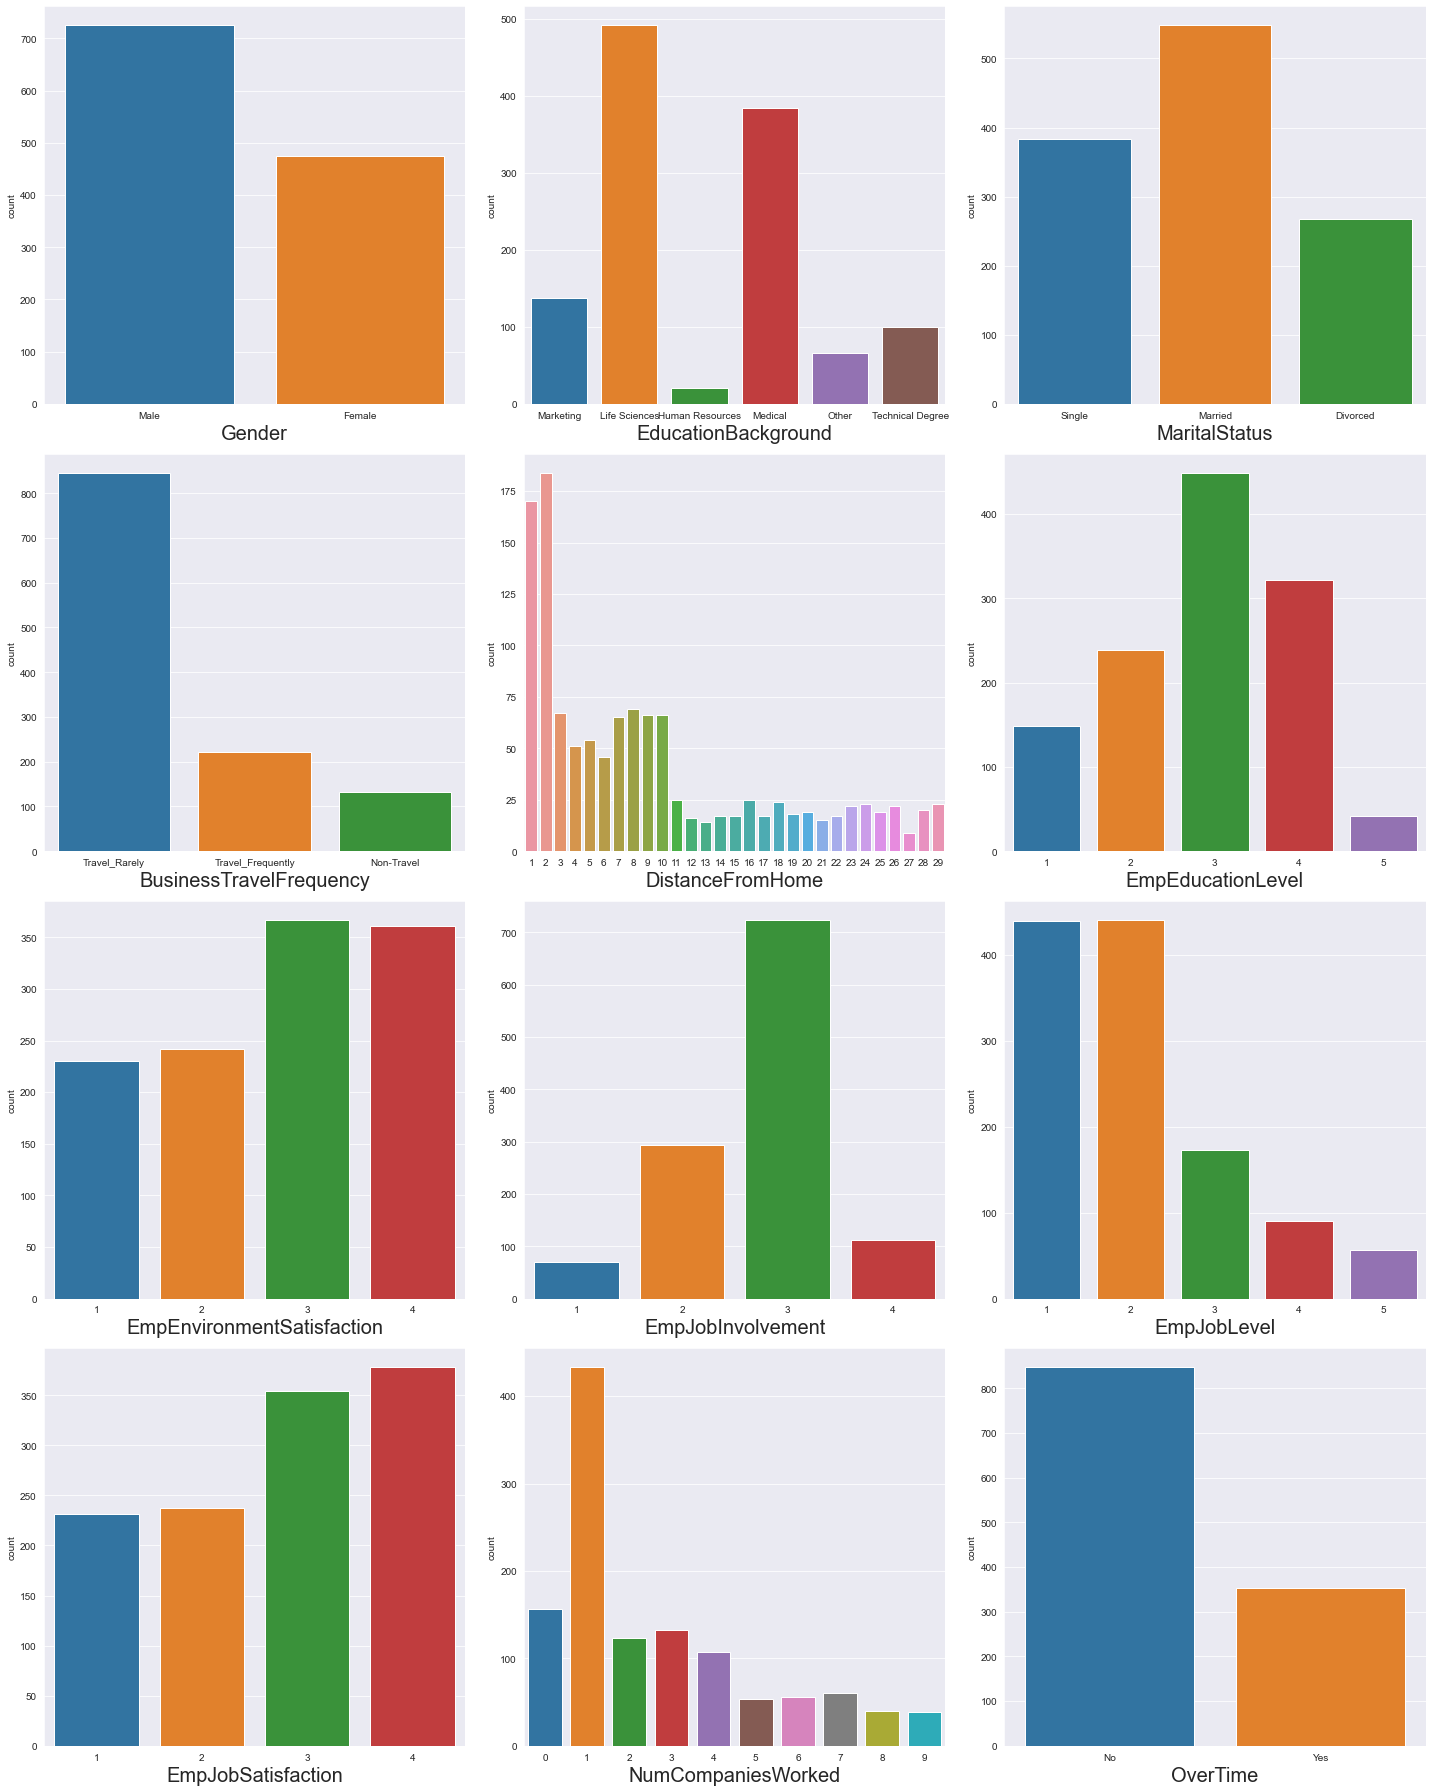

In [317]:
count = data[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in count: # iteration of columns / acessing the columns from count 
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Observation:
#### 5.Gender:
* Most of the male present in the comapany

#### 6.Education Background:
* most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100.
* other eduacation background employee is less than 100.

#### 7.MaritalStatus:
* Most of the employee is married as well as less than 400 employee is single.
* less than 300 employee mariatal status is divorced.

#### 8.Business Travel Frequency:
* Maximum no of employee travel rarely for company buisness purpose,less than 220 employee travel frequently
* remaining less than 120 employee not travell for buisness purpose.

#### 9.Distance From Home:
* The range of distance between home to comapny is 1 to 29.
* Maximum no of employee home to company distance is less than 10.

#### 10.Educational Level:
* Total range of educational level is 1 to 5,Maximum no of employee education level is 3 & 4.
* 2 education level employee is less than 250 and remianing 1 & 5 education level employee is less than 150.

#### 11.Employee Environment Satisfaction:
* Most of the employee Statisfaction is 3 & 4 
* 1 & 2 enviroment satisfaction employee less than 250

#### 12.Employee Job Involvement:
* Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300.
* Remaining 1 and 4 job involvment employee is less than 100.

#### 13.Employee Job Level:
* The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2.
* Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

#### 14.Employee Job Satisfaction:
* Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.

#### 15.Number Companies Worked:
* Maximum no of employee work with only one company.
* less no of employee work in more than 5 companies.

#### 16.Overtime:
* Most no of employee on doing over time and less than 350 employee doing overtime in company.

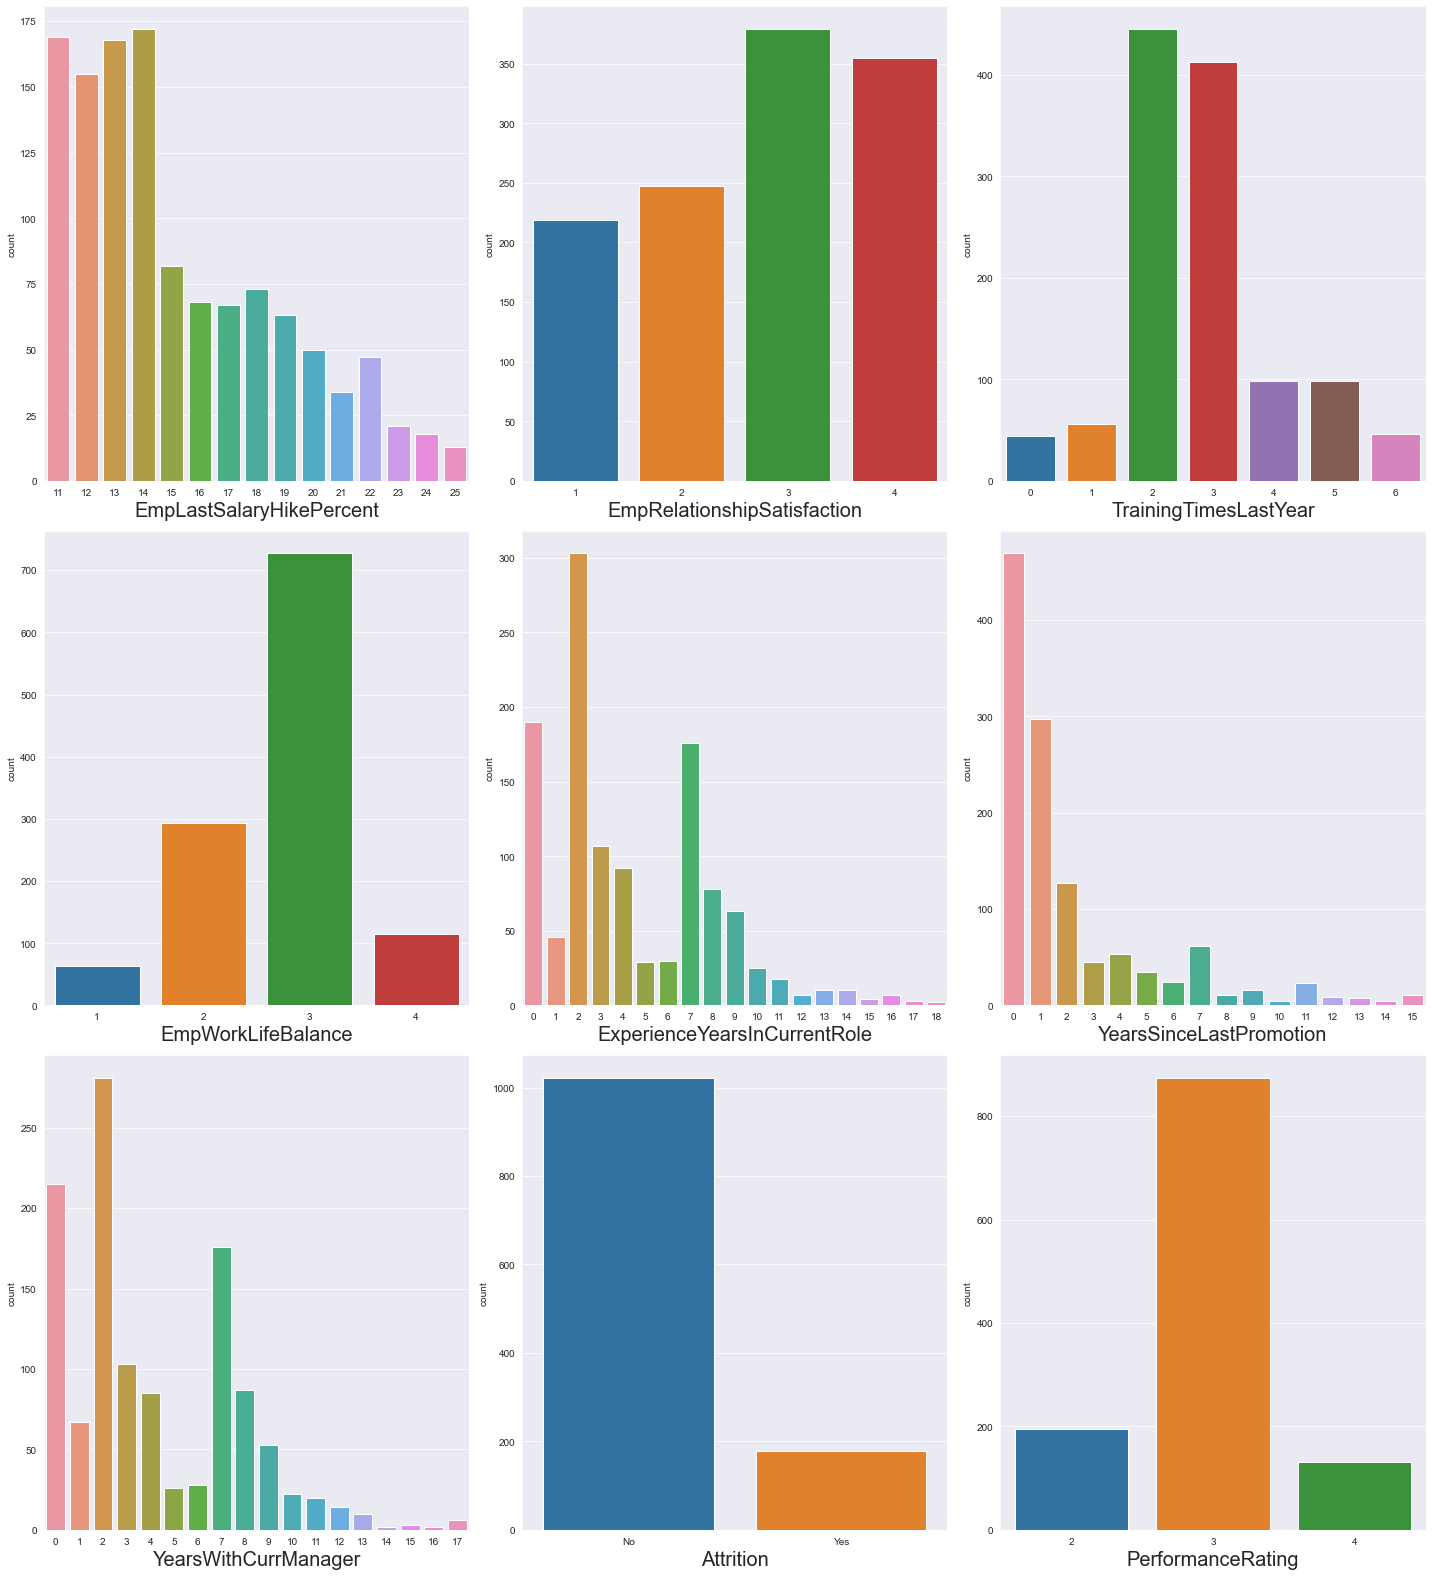

In [318]:
count2 = data[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition', 
               'PerformanceRating']]  #Making nex feature list to plot the graph

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in count2: # iteration of columns / acessing the columns from count 
    if plotno<=10:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count2[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Observation: 
#### 17.Employee Last Salary Hike Percent:
* Most no of employee salary hike percentage between 11 to 14%.total range of salary hike is 11 to 25.
* less than 80 employee last salary hike in between 15 to 19.

#### 18.Employee Relationship Satisfaction:
* The range of employee relationship satisfaction is 1 to 4,Most of the relation satisfaction is 3 & 4 as well as less than 250 employee with 1 & 2 relationship satisfaction.

#### 19.Training Times LastYear:
* The range of training time in last year between 0 to 6, Most of the employee doing 2 & 3 rd time training and remaining all times is less than 100.

#### 20.Employee Work Life Balance:
* Most most the work life balance is 3 than less than 300 employee work life balance is 2.
* Minimum work life balance is 1 as well as less than 100 employee work life balance is 4.

#### 21.Experiance In Current Role:
* Maximum current role experiance of employee is 18.
* Most of the employee have 2 years of expriance in current role then 7 year of experiance employee is less than 180
* less than 200 employee have not current role experiance.

#### 22.Years Since Last Promotion:
* The range of year since last promotion is 0 to 15.
* Most of the employee has not promoted in last year less than 300 employee has promoted atleast 1 year.

#### 23.Years With Current Manager:
* Most employee have 2 years with current manager and minimum 16 years with current manager.
* The range in between 0 to 17 and less than 180 employee has 7 years with current manager.

#### 24.Attrition:
* Maximum no of employee has not leave the company and less than 200 employee has going to leave the company.

#### 25. Target Feature == Performance Rating:
* The range of performance rating is 2 to 4, most of the employee have 3 performance ranting and less performance rating is 4.
* less than 200 employee has 2 performance rating.

#### 26.Employee Department

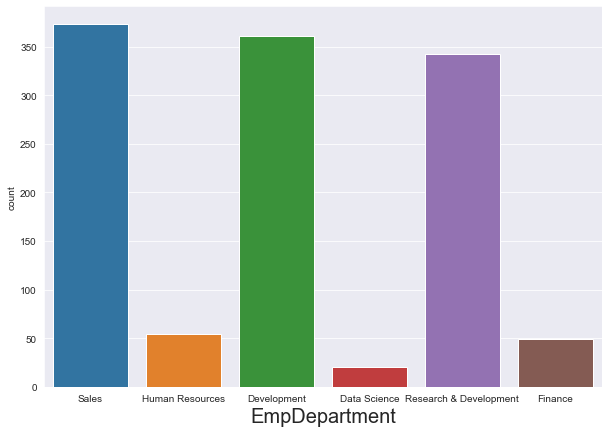

In [319]:
plt.figure(figsize=(10,7))
sns.countplot('EmpDepartment',data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.show()

**Observation:**
* Most of the employee from sales department as well as Development and research & Development departmnet employee is less than 320
* Human resources & finance department employee is almost equal.
* Data science employee has minimum in company.

#### 27.Employee Job Role

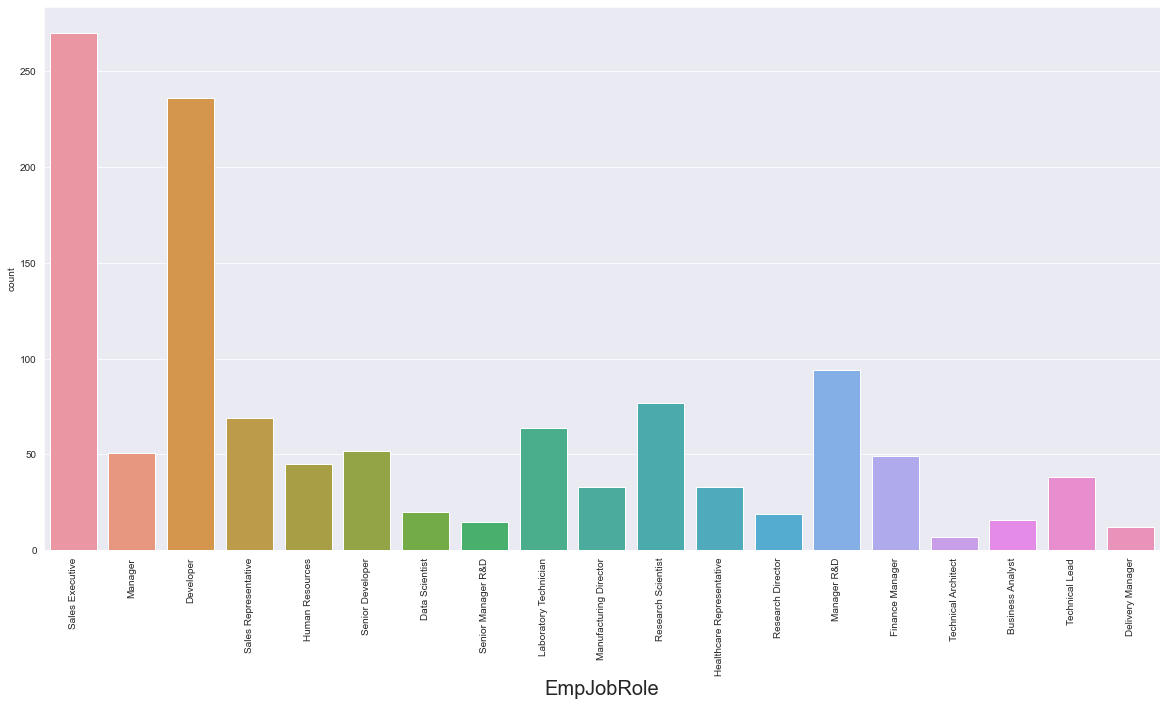

In [320]:
plt.figure(figsize=(20,10))
sns.countplot('EmpJobRole',data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.show()

**Observation:**
* Sales executive employee job role is maximum as well as Developer job role employee count is 230.
* Manage R& D and research scientist employee is less than 100 and remaining all job role employee is less than 65.

## BIAVARIATE ANALYSIS
* In Bivariate analysis Checking the relation between two features

#### ANALYSIS ON CONTINUOUS FEATURE
#### PLOT USED:
* Histogram, line plot used for continuous features
* Count used for categorical & Discrete data. 

**1.Relation Between age & Experience Years At This Company**

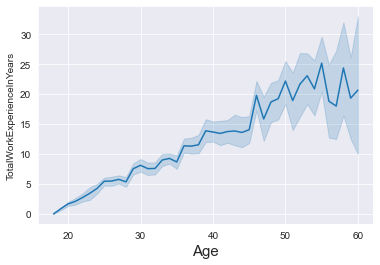

In [321]:
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('Age',fontsize=15)
plt.show()

**Observation:**
* If the age in between 18 to 25 then the total year of experiance is less than 5year.
* If the age is increases that time experiance also increases.

**2.Relation Between experiance year at this company & total work experiance**

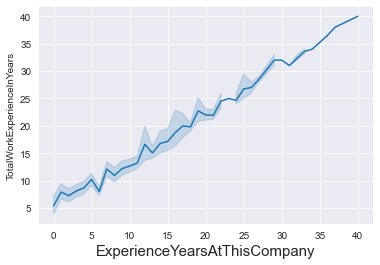

In [322]:
sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()


**Observation:**
* If he experiance year at this company that time total work experiance also increases. 

**3.Relation between Employee last salary hike and number of company worked**

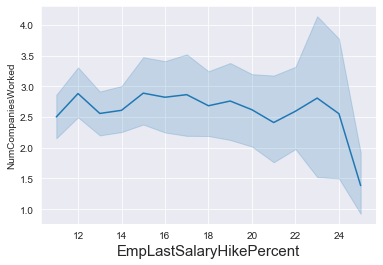

In [323]:
sns.lineplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',data=data)
plt.xlabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()


**Observation:**
* If the employee has work 1 or 2 company that time employee last salary hike percent is increases.

**4.Relation between Years Since Last Promotion and Experience Years In CurrentRole**

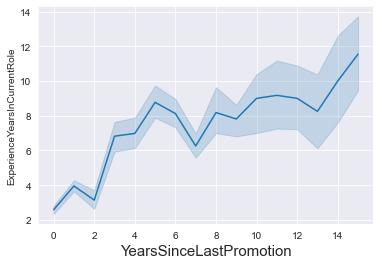

In [324]:
sns.lineplot(x='YearsSinceLastPromotion',y='ExperienceYearsInCurrentRole',data=data)
plt.xlabel('YearsSinceLastPromotion',fontsize=15)
plt.show()

**Observation:**
* In above plot clearly seen that year since last promotion is increases that time employee has more experiance with current role

**5.Relation between Employee Hourly Rate and Years With Current Manager**

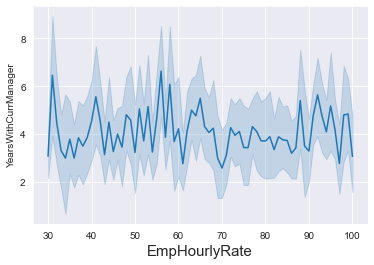

In [325]:
sns.lineplot(x='EmpHourlyRate',y='YearsWithCurrManager',data=data)
plt.xlabel('EmpHourlyRate',fontsize=15)
plt.show()

**Observation:**
* most of the employee hourly rate with their current manager is constant,but some of the employees has maximum hourly rate with less no of year with current manager.

**6.Relation between Distance From Home and Employee Last Salary Hike Percent**

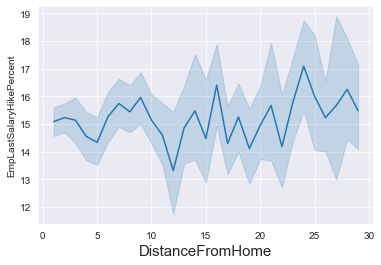

In [326]:
sns.lineplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()

**Observation:**
* If the distance from home is more then the employee salary hike is slightly increases.
* distance from home between 10 to 13 that time employee salary hike is decreases.

#### ANALYSIS ON CATEGORICAL AND DISCERETE FEATURE

#### CREATE A NEW DATAFRAME FOR CATEGORICAL FEATURES.

In [327]:
categorical = []  # Create empty list to store the feature
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


In [328]:
categorical  # All categorical features 

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

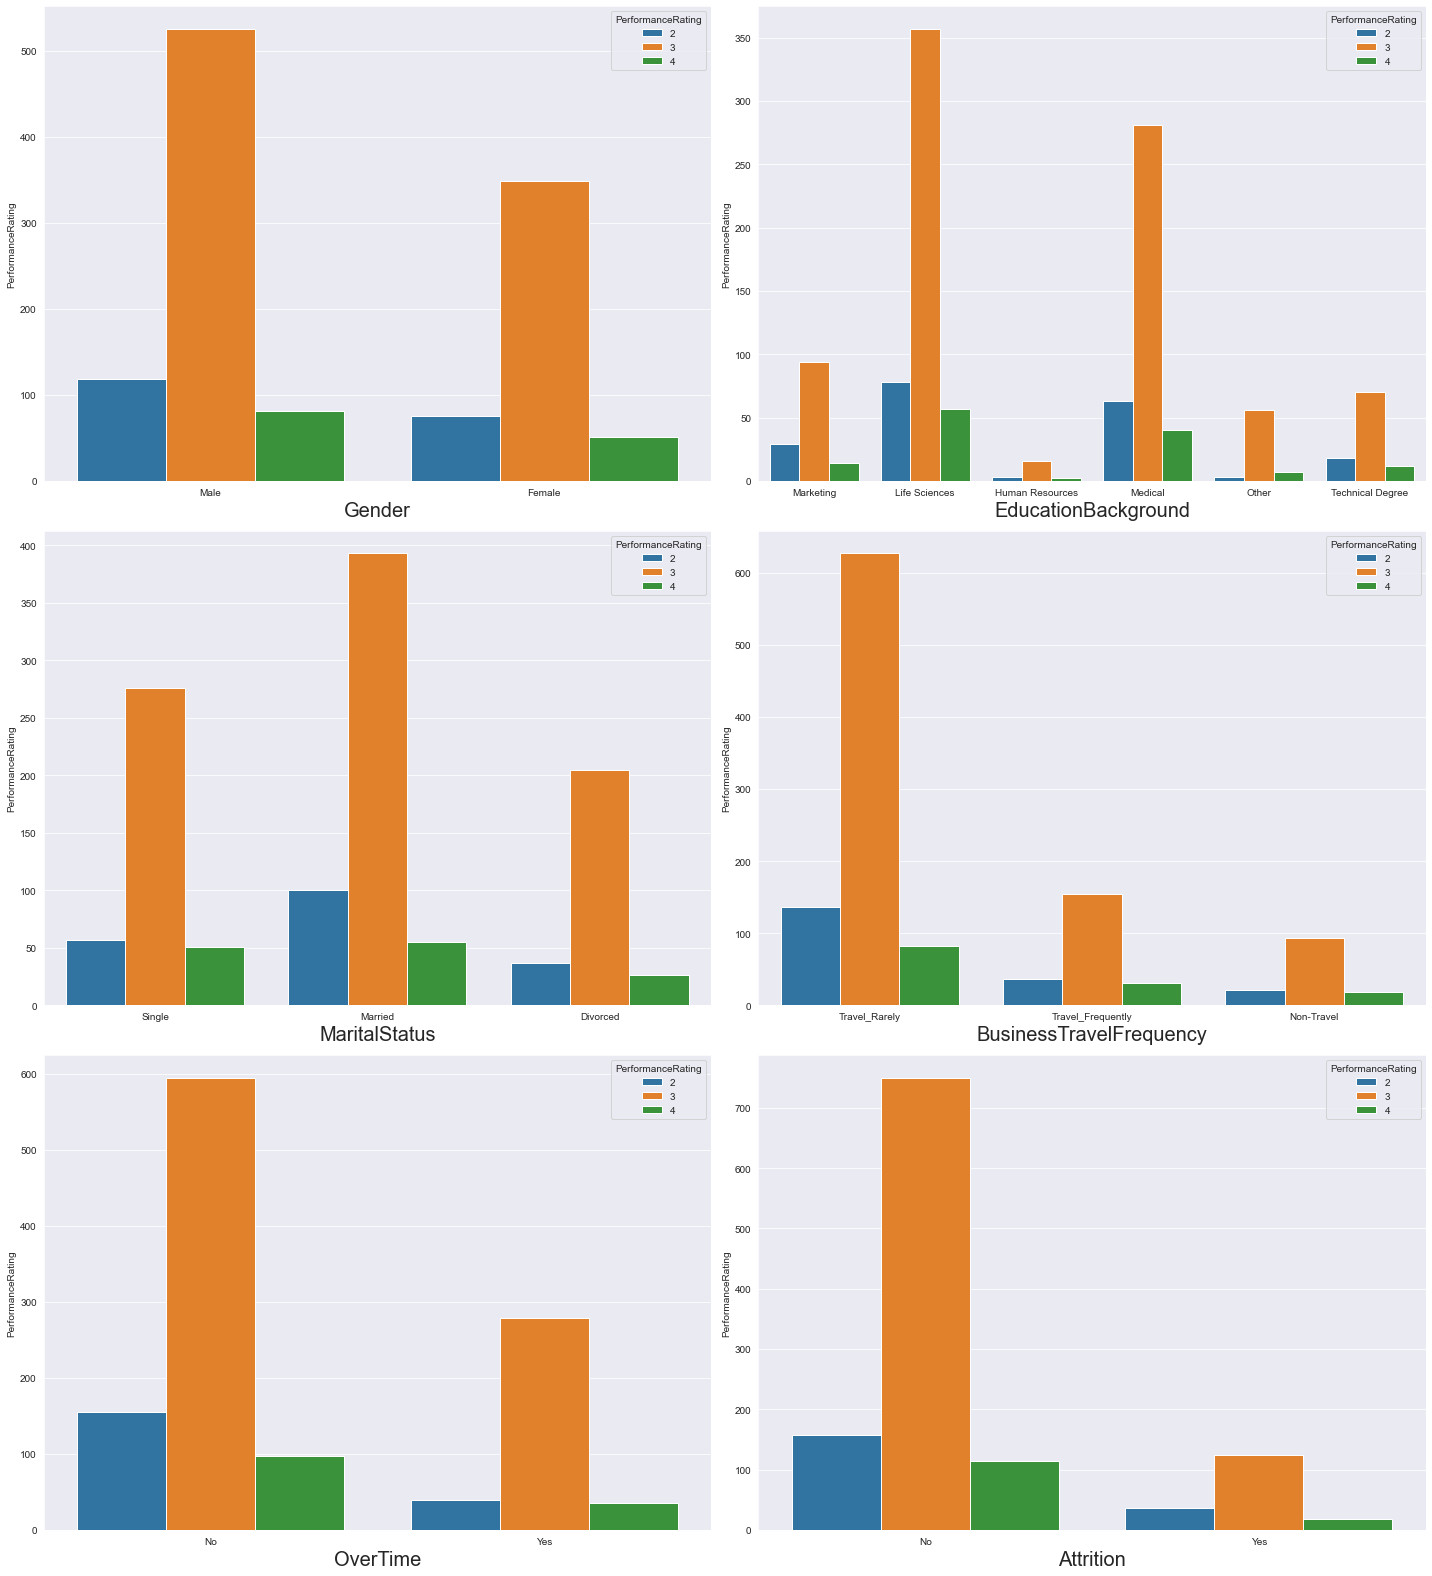

In [329]:
# Make a list of categorical feature and use sub plot to plot multiple feature
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in categorical_col: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Observations:
#### 7. Relationship between Gender and performance rating
* Maximum no of male rated with 3 performance rating as well as in female also most of the feamle rated with 3 performance rating.
* four performance rating in both male & female is less

#### 8.Relationship between EducationBackground and performance rating
* Maximum life sciences and medical education background employee rated with 3 performance rating 
* life science and medical education background employee also rated with 2 & 4 performance rating most of the time

#### 9.Relationship between MaritalStatus and performance rating
* Most of the married employee rated with 3 performance rating as well as single and divorced marital status employee rated with 3 performance rating most of the time.
* In married marital status 2 performance rating emplyee is more than single or divorced.

#### 10.Relationship between Business Travel Frequency and performance rating
* Maximum no of travel rarely employee has get 3 performance rating
* Those employee travel frequentaly this employee also rated with 2, 3, and 4

#### 11.Relationship between Overtime and performance rating
* Maximum no of employee with no overtime has rated with 3 perfomance rating
* Those employee doing overtime that time 2 & 4 performance rating is constant.

#### 12.Relationship between Attrition and performance rating
* Most of the employee rated with 3 performance rating in no means(They are not leave the company)
* Those employee have 3 performace rating those also leave the company

**13.Relationship between employee department and performance rating**

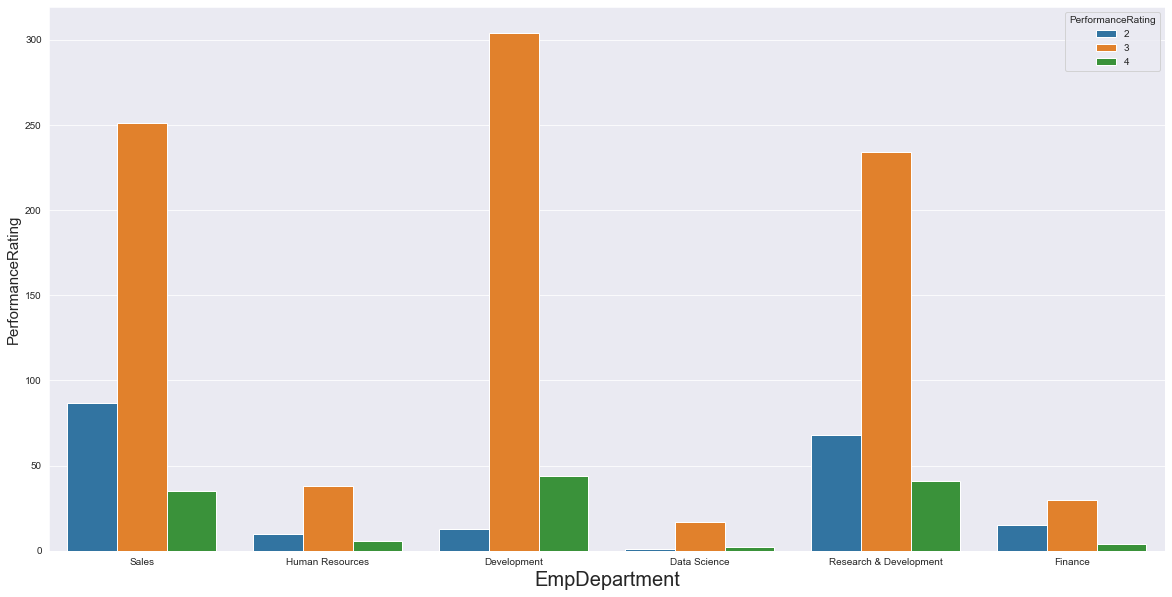

In [330]:
plt.figure(figsize=(20,10))
sns.countplot('EmpDepartment',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

**Observation:**
* Most of the Development, Sales, And Research and development employee department has 3 peformance rating
* Data science department employee has low performance rating.
* In sales & Research and development department also 2 performance rating employee avilable most of the time.

**14.Relationship between employee job role and performance rating**

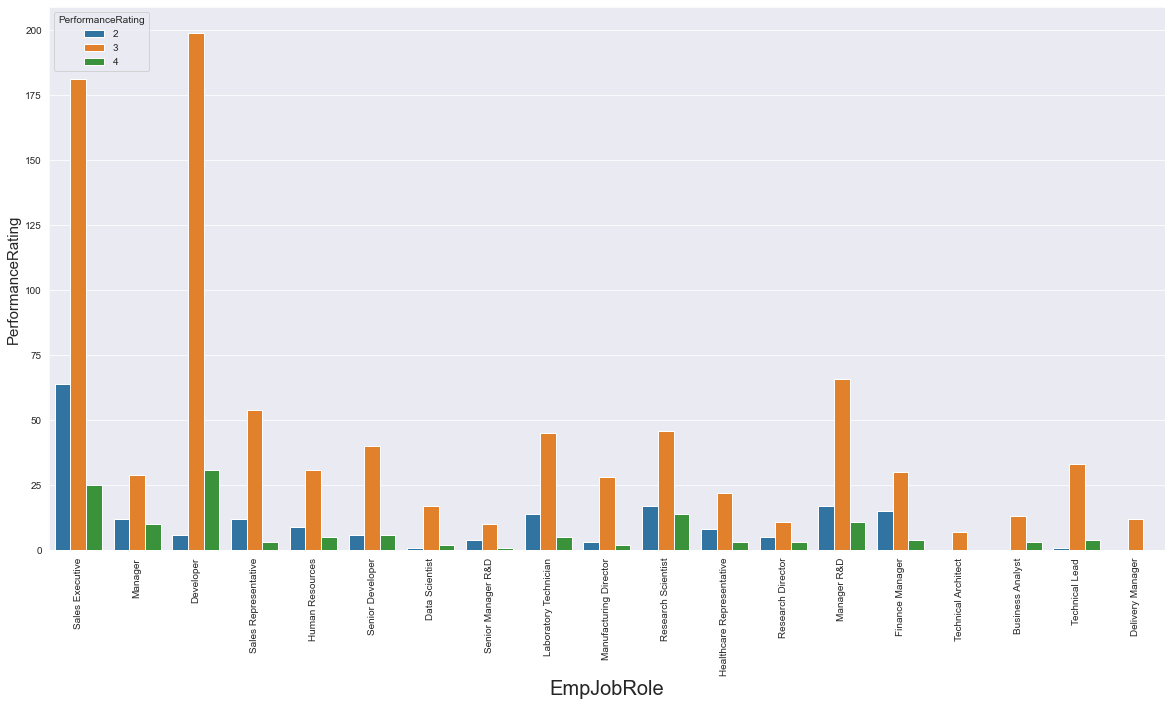

In [331]:
plt.figure(figsize=(20,10))
sns.countplot('EmpJobRole',hue=data.PerformanceRating,data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

**Observation:**
* Developers and sales executive job role employee performance rating is 3 most of the time.
* In technical architecture and delivery manger job role employee not rated with 2 & 4 performance rating.
* In sales excutive alsso less than 60 employee rated with 2 performance rating.
* Remaining all job role employee has 3 performance rating most of the time.

#### CREATE NEW DATAFRMAE FOR NUMERICAL FEATURES:

In [332]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == "int64":
        data[column].unique()   # for continuos features we use unique>=10
        numerical_col.append(column)

In [333]:
numerical_col  # All numerical features

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

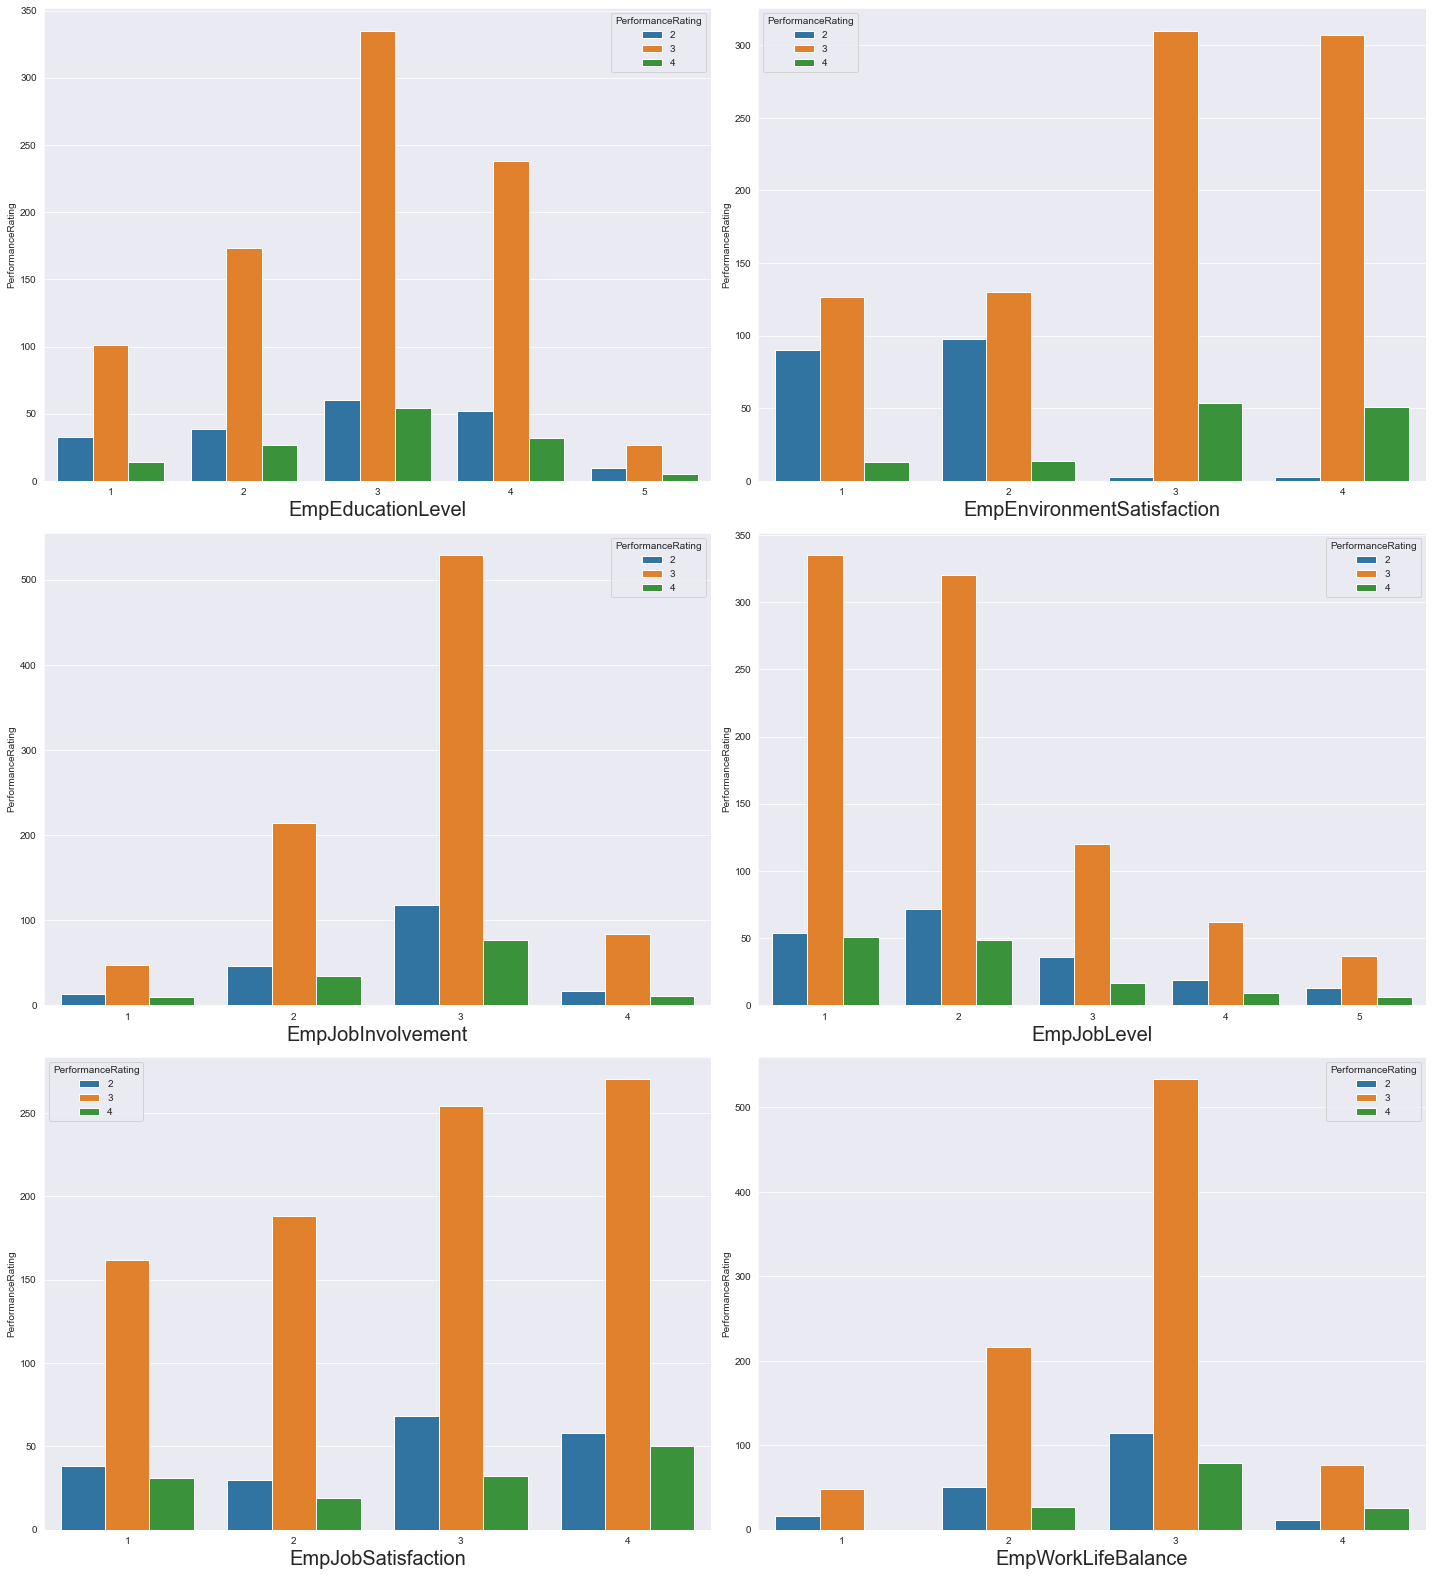

In [334]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=numerical[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Observations:
#### 15. Relationship between EmpEducationLevel and performance rating
* Those employee education level is [3,4 & 2] this employee have 3 peformance rating mostly
* If the performance rating is 2 & 4 then all eduaction level employee is less than 60.

#### 16. Relationship between EmpEnvironmentSatisfaction and performance rating
* Maximum no of employee enviorment statifaction is 3 and 4 with 3 performance rating.
* If the employee enviorment satisfaction is 1 & 2 that time the maximum employee have 2 performace rating.
* If the employee enviorment satisfaction is increases that time 4 performance rating also increases.

#### 17. Relationship between EmpJobInvolvement and performance rating
* Those employee job involvement is 2 & 3 this empluee have 3 performance rating mostly
* 2 & 4 performance rating eployee is less in all job involvment.


#### 18. Relationship between EmpJobLevel and performance rating
* If the employee job level is 1,2 & 3 that time most of the employee have 3 performance rating
* In all job levels 2 & 4 performance rating of all emplyee is less than 60.

#### 19. Relationship between EmpJobSatisfaction and performance rating
* Maximum 4 & 3 job satisfaction employee get 3 performance rating most of the time.
* In all job satisfaction 2 & 4 performance rating is less than 55 employee

#### 21. Relationship between EmpWorkLifeBalance and performance rating
* If the employee work life balance is 3 that time maximum no of employee have 3 performance rating.
* If the work life balance is 1 that time no one get 4 performance rating.

## MULTIVARIATE ANALYSIS

* Checking the relationship between two features with respect to target features

#### PLOT USED: 
**Line plot:** A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.
**Barplot:** It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

**1.Check the relationship between Age & Total work experiance with respect to target feature**

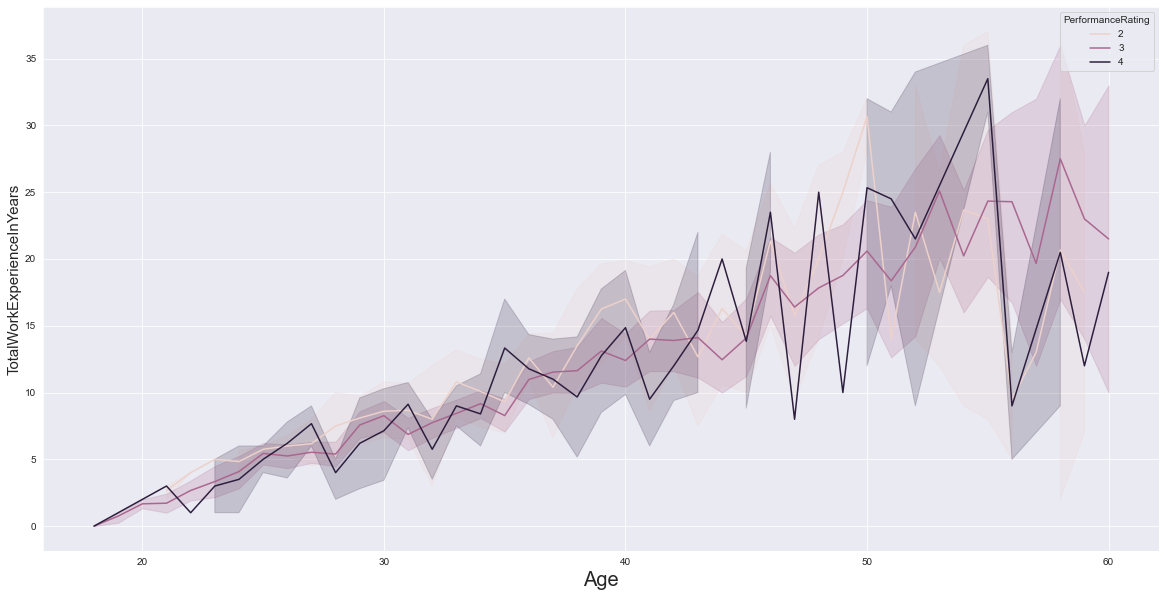

In [335]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=data.PerformanceRating,data=data)
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()

**Observation:**
* If the age & total experiance is increases that time most of the employee performance rating is 4.
* Low age and minimum year experiance employee also 4 perfomace rating.
* At the age of 50 and 30 years of experiance employee have 2 performance rating.

**2.Check the relationship between Gender & Number Companies Worked with respect to target feature**

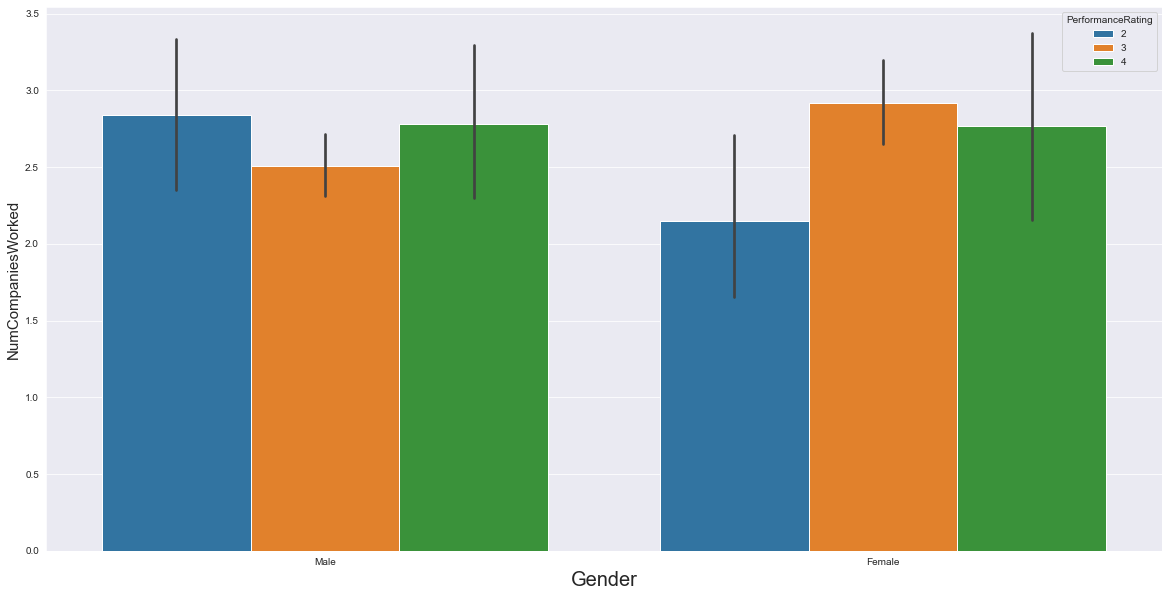

In [336]:
plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

**Observation:**
* If the gender is male and no of companies work is increses that time most of the performance rating is 2 & 4.
* If female work in less no companies that time performance rating is 2.
* 3 & 4 performance rating in female increase if the no of compaines worked is increses.

**3.Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature**

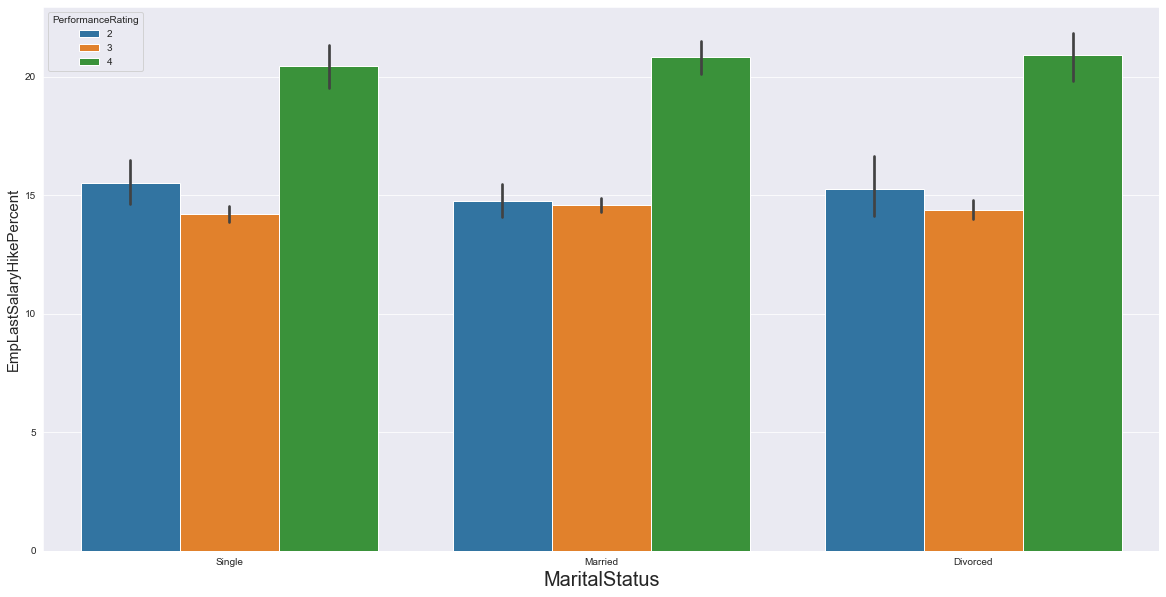

In [337]:
plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=data.PerformanceRating,data=data)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

**Observation:**
* In all marital status with maximum salary hike percent in last year is increases that time performance rating is 4.
* If salary hike percentage in last year is less than 15 that time performance rating is 2 & 3 in all marital status.

**4.Check the relationship between BusinessTravelFrequency & EmpEnvironmentSatisfaction with respect to target feature**

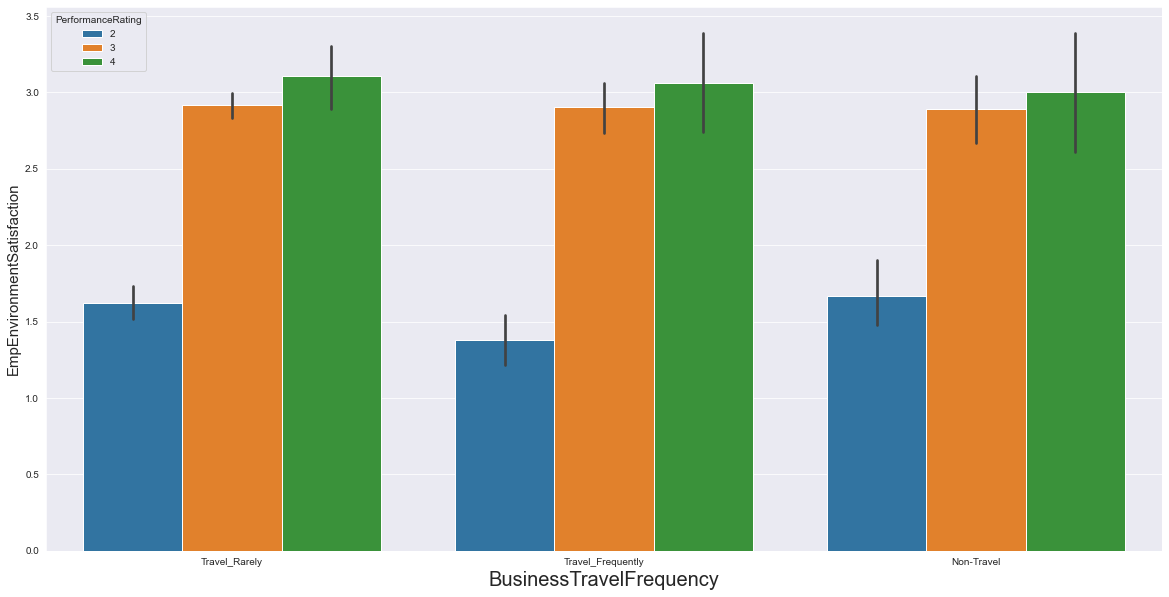

In [338]:
plt.figure(figsize=(20,10))
sns.barplot(x='BusinessTravelFrequency',y='EmpEnvironmentSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('BusinessTravelFrequency',fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

**Observation:**
* If the employee enviorment satisfaction is high that time performance rating is 3 & 4 in all buisness travel frequency.
* Low employee enviorment satisfaction has 2 performance rating in all buisness travel frequency.

**5.Check the relationship between Attrition & YearsWithCurrManager with respect to target feature**

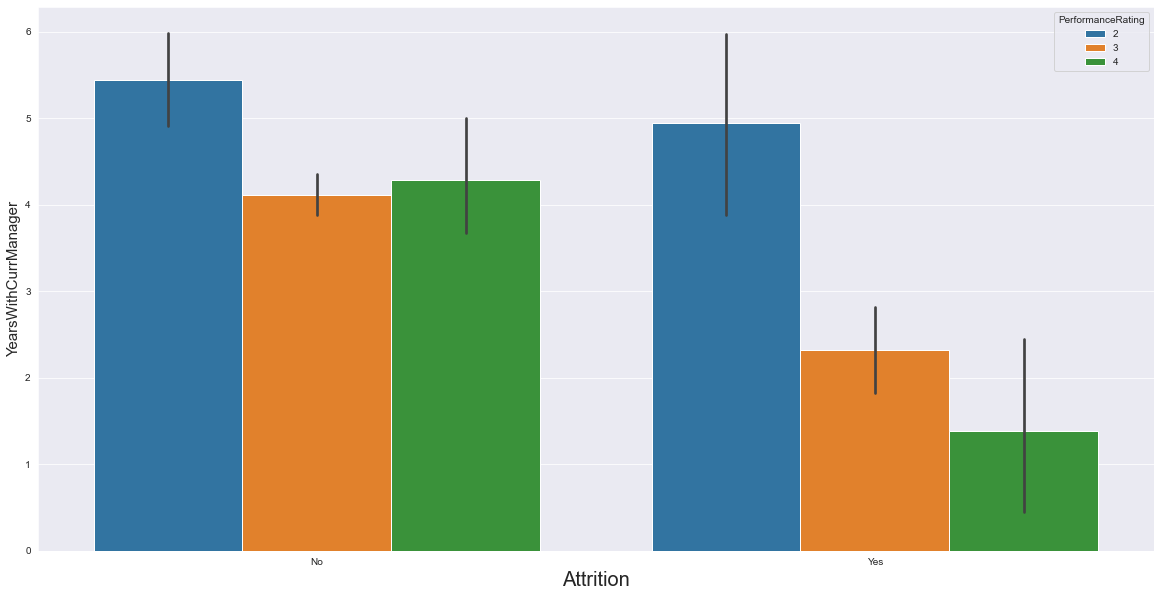

In [339]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

**Observation:**
* If the employee current manager year is increses that time performance rating is 2 and 50-50% chances of employee to leave the company.
* those employee perfomance rating is 4 and current manger year is increases that time most of the employee not leave the company.

**6.Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature**

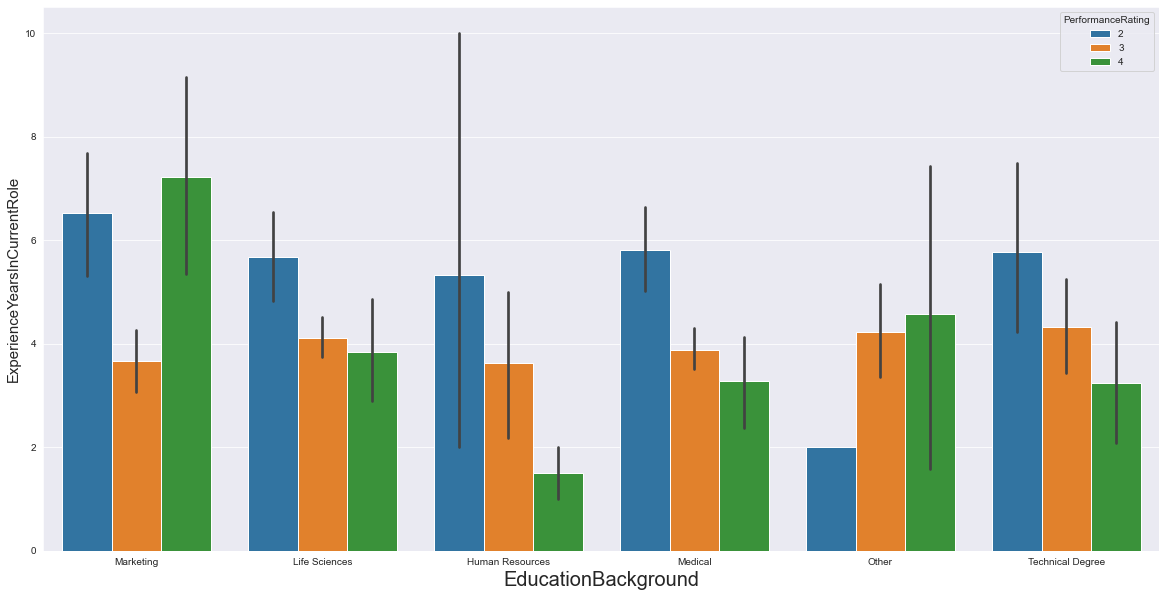

In [340]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=data.PerformanceRating,data=data)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

**Observation:**
* If the current role experiance is increses of marketing education background employee has 4 performance rating most of the time
* In all education background with current role experiance is more than 5 then the performance rating of employee is 2.
* Life scineces, Medical, others , and technical degree education background employee has less than 4 year of experiance in current role that time performance rating is 3 & 4.

**7.Check the relationship between OverTime & DistanceFromHome with respect to target feature**

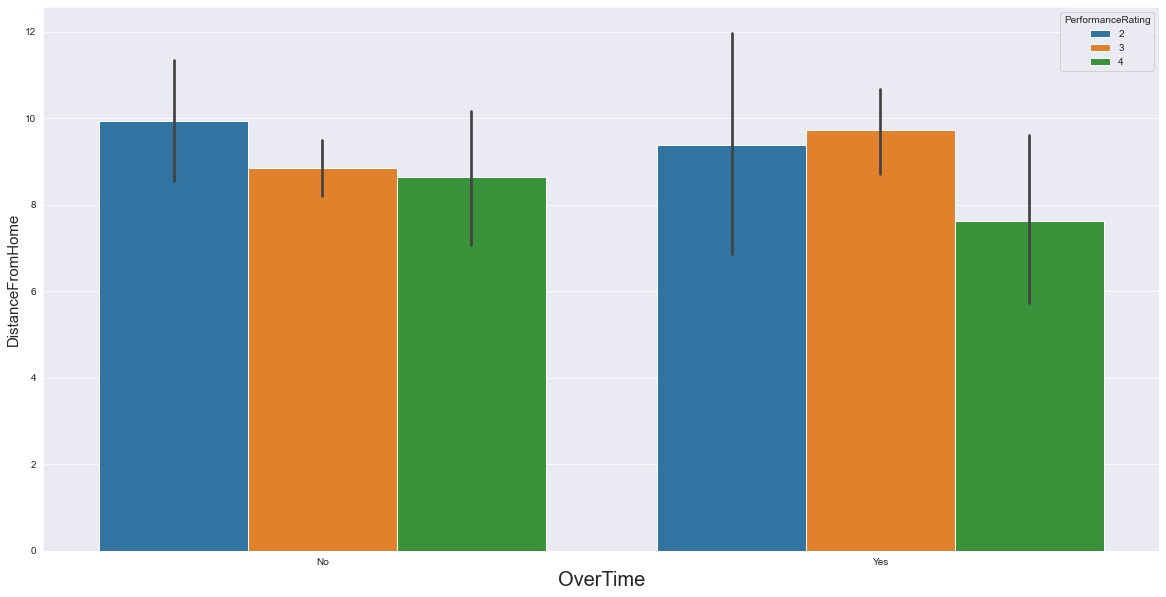

In [341]:
plt.figure(figsize=(20,10))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=data.PerformanceRating,data=data)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

**Observation:**
* If the distance from home is increses that time performance rating is constant with employee doing overtime as well as not doing overtime.

**8.Check the relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature**

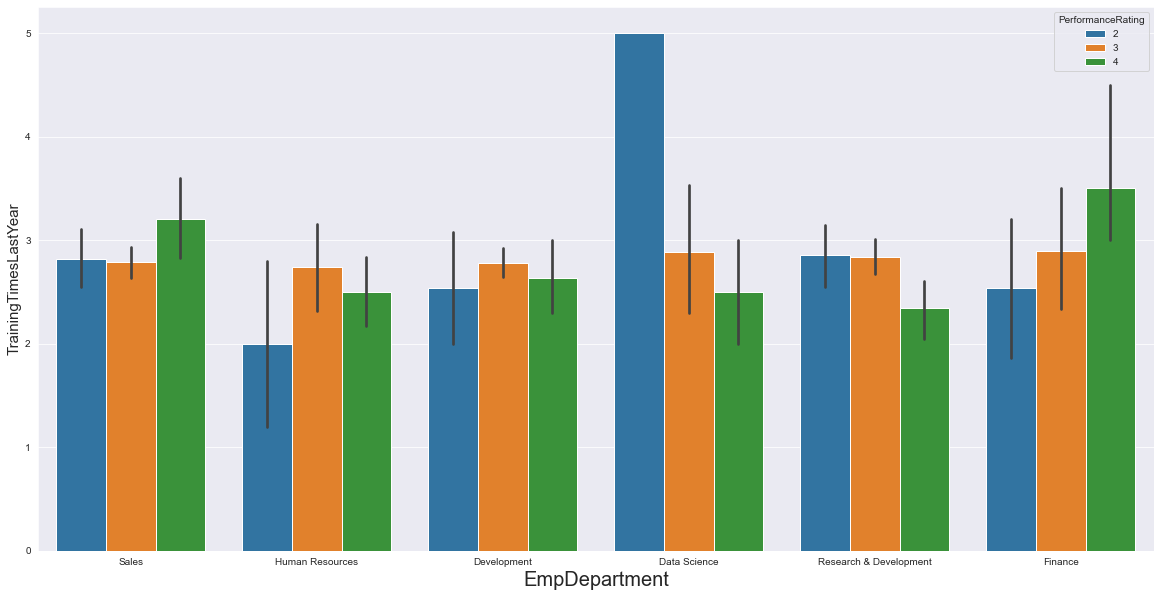

In [342]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

**Observation:**
* If the employee from data science department and most training time in last year then the performance rating is 2 maximum time.
* Other all employee department with less than 3 time training in last year then the peroformance rating is constant.

**10.Check the relationship between Attrition &  NumCompaniesWorked with respect to target feature**

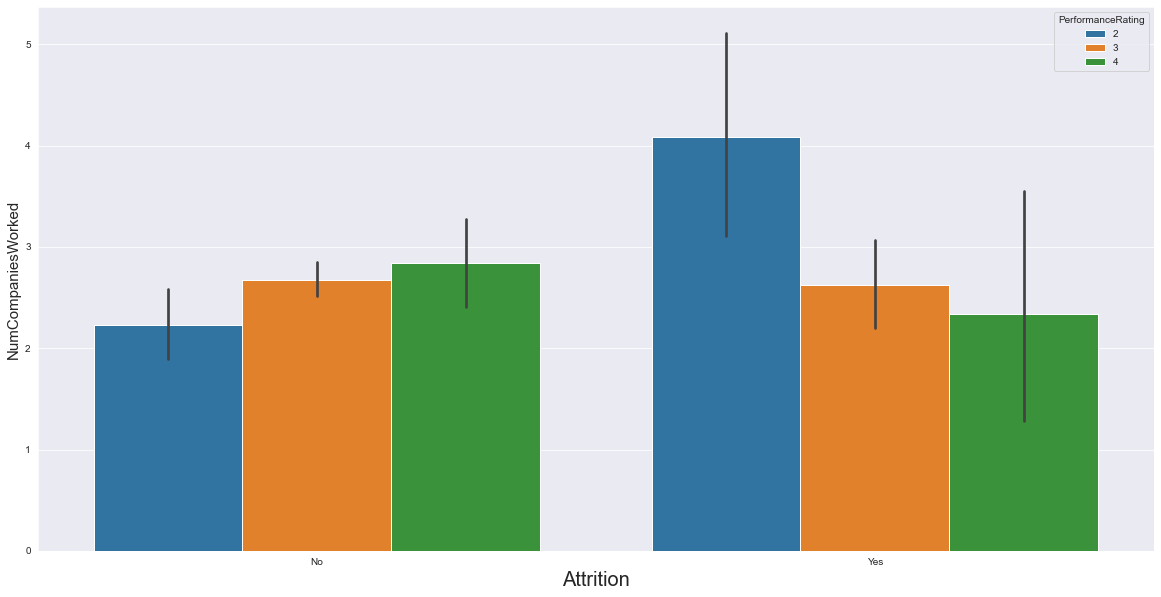

In [343]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

**Observation:**
* If emplyee number of companies worked is increses that time most of the employee leave the company and their performance rating is 2
* Those employee have work in less no of companies they are not leave the company and their performance rating is constant.

#### CONCLUSION
* There are some features are positively correlated with performance rating( Target variable)
[Emp Environment Satisfaction,Emp Last Salary Hike Percent,Emp Work Life Balance]

#### MODEL CREATION & EVALUATION SUMMARY:
* Loading pre-process data
* Define dependant & independant features
* Balancing the target feature
* Split training and testing data
* Model creation, prediction & evaluation
* Model saving

### IMPORT NECESSARY LIBRARY

In [344]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

### LOADING PREPROCESS DATA

In [345]:
data = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


### DEFINE INDEPENDANT & DEPENDANT FEATURES

In [346]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [347]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,Attrition
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894


In [348]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

### BALANCING THE TARGET FEATURE

**SMOTE:** SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [349]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


* Now target feature in balance

### SPLIT TRAINING AND TESTING DATA

In [350]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testing

In [351]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

### MODEL CREATION, PREDICTION AND EVALUATION

#### AIM 
* Create a sweet spot model (Low bias, Low variance)

#### HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM
* Support Vector Machine
* Random Forest
* Artificial Neural Network [MLP Classifier]

### 1.Support Vector Machine

In [352]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training 
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)


#### TRAINING ACCURACY

In [353]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 96.47114926084883
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       1.00      0.94      0.97       730
           3       0.91      0.98      0.95       651
           4       0.98      0.97      0.98       716

    accuracy                           0.96      2097
   macro avg       0.96      0.97      0.96      2097
weighted avg       0.97      0.96      0.97      2097



* Support vector classifier perform well on training data

#### TESTING ACCURACY

In [354]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 94.66666666666667
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.94      0.97       195
           3       0.86      0.97      0.91       153
           4       0.98      0.93      0.96       177

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



* In testing score is still lagging so we are going to do hyperparameter tunning with the help of grid search cv

#### HYPER PARAMETER TUNNING WITH GRID SEARCH CV

In [355]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model = SVC() # Object creation
grid = GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)

# Step:10 fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.1s
[CV] END ...................

[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0

[CV] END .................C=0.1, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END ...................C=0.5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=0.5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C

[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.

[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0

[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.1s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.1s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.1s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.1s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.1s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.1s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.4s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.2s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.2s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=5

[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.1s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.1s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.1s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.1s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.1s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.1s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.1s
[CV] END ...................

[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=6

[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.1s
[CV] END ...................

[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.1s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.1s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.1s
[CV] END ...................

[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.1s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.1s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.1s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.1s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.1s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.1s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.1s
[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.1s
[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=

[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=8

[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [356]:
# set the best parameter 
clf =SVC(C=0.6,gamma=0.1,random_state=1)

# fit the model
clf.fit(X_train,y_train)

# Predict the x test
y_hat_clf = clf.predict(X_test)


#### TESTING ACCURACY AFTER HYPERPARAMETER TUNNING

In [357]:
test_accuracy = accuracy_score(y_hat_clf,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(y_hat_clf,y_test))

Testing accuracy of support vector classifier model 98.47619047619047
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.99      0.99       181
           3       0.98      0.98      0.98       173
           4       1.00      0.98      0.99       171

    accuracy                           0.98       525
   macro avg       0.99      0.98      0.98       525
weighted avg       0.98      0.98      0.98       525



* After hyperparameter tunning score is increases

### 2.Random Forest

In [358]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)


#### TRANING ACCURACY

In [359]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



* Random forest classifier very well work on training data.

#### TESTING ACCURACY

In [360]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 96.19047619047619
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       188
           3       0.91      0.97      0.94       163
           4       0.99      0.96      0.98       174

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



#### HYPER PARAMETER TUNNING WITH RANDOMIZED SEARCH CV

In [361]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(X_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 37}


In [362]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)


#### TEST ACCURACY AFTER HYPER-PARAMETER TUNNING

In [363]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 94.85714285714286
Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       188
           3       0.89      0.95      0.92       162
           4       0.98      0.94      0.96       175

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



* After hyperparameter tunning score is not increases.

### 3.Artificial Neural Network [MLP Classifier]

In [364]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [365]:
# Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [366]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[2.90611869e-04, 9.99707267e-01, 2.12138490e-06],
       [1.73265410e-05, 9.99943765e-01, 3.89088660e-05],
       [9.96570935e-01, 3.42896114e-03, 1.04186150e-07],
       ...,
       [9.82937473e-01, 1.70401416e-02, 2.23854316e-05],
       [7.92026434e-03, 9.92064974e-01, 1.47617895e-05],
       [4.26752619e-19, 8.97088086e-09, 9.99999991e-01]])

In [367]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

#### TRAINING ACCURACY

In [368]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 99.28469241773963
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.98      0.99       705
           3       0.98      1.00      0.99       686
           4       1.00      1.00      1.00       706

    accuracy                           0.99      2097
   macro avg       0.99      0.99      0.99      2097
weighted avg       0.99      0.99      0.99      2097



* Multilayer percepton Perform well on training data.

#### TESTING ACCURACY

In [369]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 95.80952380952381
Classification report of testing:
               precision    recall  f1-score   support

           2       0.98      0.97      0.98       187
           3       0.90      0.97      0.93       161
           4       0.99      0.94      0.96       177

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



* Multilayer percepton perform well on testing data

#### CONFUSION MATRIX

In [370]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,181,6,0
3,3,156,2
4,0,11,166


**Conclusion:**
* Support vector machine well perform on training data with accuracy 96.61% but the test score is 94.66 after applying Hyperparameter tunning score is 98.28 means model is overfit.
* Random forest very well perform in training data with 100% accuracy but in testing 95.61% after doing hyperparameter tunning testing score is decreases.
* Artifical neural network[Multilayer percepton] perform very well on training data with 98.95% accuracy and testing score is 95.80%.
* So we are select Artifical neuranl network [Multilayer percepton] model.

## MODEL SAVING

In [371]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl' ,'wb')
pickle.dump(model,file)

# Employee Performance Analysis
## INX Future Inc.



**The Goal and Insights of the project are as follows:**

* Department wise performances
* Top 3 Important Factors effecting employee performance
* A trained model which can predict the employee performance based on factors as inputs.
 This will be used to hire employees
* Recommendations to improve the employee performance based on insights from analysis


The given Employee dataset consist of 1200 rows. The features present in the data are 28 columns. The shape of the dataset is 1200x28. The 28 features
are classified into quantitative and qualitative where 19 features are quantitative (11 columns consists numeric data & 8 columns consists ordinal data) and
8 features are qualitative. EmpNumber consist alphanumerical data (distinct values) which doesn't play a role as a relevant feature for performance rating.

From Correlation we can get the important aspects of the data, Correlation between features and Performance Rating.Correlation is a statistical measure
that expresses the extent to which two variables are linearly related.The analysis of the project has gone through the stage of Univariate,Bivariate & Multivariate analysis,
correlation analysis and analysis by each department to satisfy the project goal.

The dataset consists of Categorical data and Numerical data. The Target variable consist of ordinal data, so this is a classification problem.The multiple machine learning model used in this project is Support vector classifier, Random forest classifier & Artifical neural network[Multilayer percepton]. from above all models Artifical neural network[Multilayer percepton] predicts higher accuracy 95.80%.

One of the important goal of this project is to find the important feature affecting the performance rating. The important features were predicted using the machine learning model feature importance technique. The main technique used in the preprocessing data using the Mannual & Frequency encoding method to convert the string - categorical data into numerical data, because, Most of machine learning methods are based on numerical methods where strings are not supportive. The overall project was performed and achieved the goals by using the machine learning model and visualization techniques.


# 1. Requirement
The data was given from the IABAC for this project where the collected source is IABAC™. The data is based on INX Future Inc, (referred as INX ). It is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. The data is not from the real organization. The whole project was done in Jupiter notebook with python platform.

# 2. Analysis
Data were analyzed by describing the features present in the data. the features play the bigger part in the analysis. The features tell the relation between the dependent and independent variables. Pandas also help to describe the datasets answering following questions early in our project. The data present in the dataset are divided into numerical and categorical data.

## Categorical Features
* EmpNumber
* Gender
* EducationBackground
* MaritalStatus
* EmpDepartment
* EmpJobRole
* BusinessTravelFrequency
* OverTime
* Attrition

## Numerical Features
* Age
* DistanceFromHome
* EmpHourlyRate
* NumCompaniesWorked
* EmpLastSalaryHikePercent
* TotalWorkExperienceInYears
* TrainingTimesLastYear
* ExperienceYearsAtThisCompany
* ExperienceYearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

## Ordinal Features
* EmpEducationLevel
* EmpEnvironmentSatisfaction
* EmpJobInvolvement
* EmpJobLevel
* EmpJobSatisfaction
* EmpRelationshipSatisfaction
* EmpWorkLifeBalance
* PerformanceRating

## 3.Univariate, Bivariate & Multivariate Analysis

* Library Used: Matplotlib & Seaborn
* Plots Used: Histplot, Lineplot, CountPlot, Barplot
* Tip: All Observation or insights written below the plots

**Univariate Analysis:** In univariate analysis we get the unique labels of categorical features, as well as get the range & density of numbers.


**Bivariate Analysis:** In bivariate analysis we check the feature relationship with target veriable.

**Multivariate Analysis:** In multivariate Analysis check the relationship between two veriable with respect to the target veriable.


#### CONCLUSION
* There are some features are positively correlated with performance rating( Target variable)
[Emp Environment Satisfaction,Emp Last Salary Hike Percent,Emp Work Life Balance]

# 4.Exploratory Data Analysis

### Basic Check & Statistical Measures
* Their is no constant column is present in Numerical as well as categoriacl data.

## Distribution of Continuous Features:
In general, one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, we shall invoke the familiar distplot function from the Seaborn plotting library. The distribution has been done by both numerical features. it will show the overall idea about the density and majority of data present in a different level.

* The age distribution is starting from 18 to 60 where the most of the employees are laying between 30 to 40 age count
* Employees are worked in the multiple companies up to 8 companies where most of the employees worked up to 2 companies before getting to work here.
* The hourly rate range is 65 to 95 for majority employees work in this company.
* In General, Most of Employees work up to 5 years in this company. Most of the employees get 11% to 15% of salary hike in this company.

#### Check Skewness and Kurtosis of Numerical Features
Checking weather the data is Normally distributed or Not with Skewness and Kurtosis,
* YearsSinceLastPromotion, This column is skewed
* skewness for YearsSinceLastPromotion: 1.9724620367914252
* kurtosis for YearsSinceLastPromotion: 3.5193552691799805

#### Distribution of Mean of Data
* Distribution of mean close to guassian distribution with mean value 9.5
* we can say that around 80% feature mean lies between 8.5 to 10.5

#### Distribution of Standard Deviation of Data
Distribution of standard deviation of data also look like guassian distribution around 30% of feature standard deviation around the range of 3 3 to 20 and remaining 70% feature standard deviation in between 0 to 2

# 5.Data Pre-Processing
**1.Check Missing Value:** Their is no missing value in data

**2.Categorical Data Conversion:** Handel categorical data with the help of frequency and mannual encoding, because feature is contain lot's of labels

* Mannual Encoding: Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

* Frequency Encoding: Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

**3.Outlier Handling** Some features are contain outliers so we are impute this outlier with the help of IQR because in all features data is not normally distributed

**4.Feature Transformation:** In YearsSinceLastPromotion some skewed & kurtosis is present, so we are use Square Root Transformation techinque

* Square root transformation: Square root transformation is one of the many types of standard transformations.This transformation is used for count data (data that follow a Poisson distribution) or small whole numbers. Each data point is replaced by its square root. Negative data is converted to positive by adding a constant, and then transformed.
* Q-Q Plot: Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

**5.Scaling The Data:** scaling the data with the help of Standard scalar
* Standard Scaling: Standardization is the process of scaling the feature, it assumes the feature follow  normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.



# 6.Future Selection
**1.Drop unique and constant feature:** Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root transformation

**2.Checking Correlation:** Checking correlation with the help of heat map, and get the their is no highly correlated feature is present.
* Heatmap: A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

**3.Check Duplicates:** In this data Their is no dupicates is present.

**4.PCA:** Use pca to reduce the dimension of data, Data is contain total 27 feature after dropping unique and constant column,from PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

* Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.

**5.Saving Pre-Process Data:** save the all preprocess data in new file and add target feature to it.

# 7.Machine learning Model Creation & Evaluation
**1.Define Dependant and Independant Features:**

**2.Balancing the data:** The data is imbalance, so we need to balance the data with the help of SMOTE
* SMOTE: SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

**3.Splitting Training And Testing Data:** 80% data use for training & 20% data used for testing


### Algorithm:

**AIM:** Create a sweet spot model (Low bias, Low variance)

**HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM**
1. Support Vector Machine
2. Random Forest
3. Artificial Neural Network [MLP Classifier]

* Support vector machine well perform on training data with accuracy 96.61% but the test score is 94.66 after applying Hyperparameter tunning score is 98.28 means model is overfit.
* Random forest very well perform in training data with 100% accuracy but in testing 95.61% after doing hyperparameter tunning testing score is decreases.
* Artifical neural network[Multilayer percepton] perform very well on training data with 98.95% accuracy and testing score is 95.80%.
* So we are select Artifical neuranl network [Multilayer percepton] model.

# Tools and Library Used:

### Tools: 
* Jupyter

### Library Used: 
* Pandas
* Numpy
* Matplotlib
* Seaborn
* pylab
* Scipy
* Sklearn


# Goal 1: Department Wise Performances
**PLOT USED**
* Violinplot:  It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.
* CountPlot: countplot is used to Show the counts of observations in each categorical bin using bars.



**Sales:** The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

**Human Resources:** The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

**Development:** The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

**Data Science:** The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

**Research & Development:** The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

**Finance:** The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

# Goal 2: Top 3 Important Factors effecting employee performance
The top three important features affecting the performance rating are ordered with their importance level as follows,
1. Employment Environment Satisfaction
2. Employee Salary Hike Percentage
3. Experience Years In CurrentRole
 
**Employee Enviroment satisfaction:** Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

**Employee last salary hike percent:** More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time. as well asEmployees whose salary hike percentage is in between 20-22%, There performance rating is 4.

**Employee work life balance:** In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees


# Goal 3: A Trained model which can predict the employee performance
The trained model is created using the machine learning algorithm as follows with the accuracy score,

1. Support Vector Classifier: 98.28% accuracy
2. Random Forest classifier: 95.61% accuracy
3. Artifical Neural Network [Multilayer percepton]: 95.80%

# Goal 4: Recommendations to improve the employee performance
1. The overall employee performance can be achieved by employee environment satisfaction. The company needs to focus more on the employee environment satisfaction.
2. The salary hike will give the boost to the employees to perform well.
3. Promote the employee ervery 6th month
4. Improve Employee's work-life balance this affects the performance rating.
5. While recruiting for HR, consider the female candidates where they perform well compared to male.
6. The development and sales department is having an overall higher performance comparing to rest of the departments.
While some of the employees who gives feedback like Low & Medium from Job Satisfaction & Relationship Satisfaction feature, such employees gives Excellent performance more in number. So company should focus on them.